---

# 데이터 분석 (EDA)

---

# 1. Pandas 기초 

## Import

- import module 
  - module 불러오기 
  - ex) module.function
- import module as md
  - module의 이름을 md로 설정하여 사용
  - ex) md.function
- from module import function
  - module에 포함된 function만 사용
  - ex) function

In [ ]:
import pandas as pd
import numpy as np

## Read CSV

- read_csv
  - CSV 파일 읽기
  - encoding : 파일 형식
  - filepath or buffer : 파일경로/파일이름.csv 을 입력하여 파일을 불러옵니다.
  - sep or delimiter : 초기값은 comma(,), 만일 분리되어있는 기준이 쉼표(,)로 분리되어 있지 않은 경우 기준이 되는 값을 입력하면 됩니다. 예를 들어 슬라이스(/), Tab( ) 등 으로 분리되어 있는 경우를 말합니다.
  - header : 초기값은 0, 컬럼명으로 사용할 행의 번호를 입력합니다.
  - names : 사용할 변수명을 입력합니다. 파일에 변수명이 없다면 header를 None으로 설정해야합니다.
  - index_col : 데이터의 인덱스로 사용할 열의 번호를 입력합니다.
  - skiprows : 첫 행을 기준으로 데이터를 얼마나 건너뛰고 읽어올지를 정합니다.
  - nrows : 파일을 읽어올 행의 수를 입력합니다.
  - date_parser : 시계열 타입으로 변환할 변수를 입력합니다.

In [ ]:
cctv_seoul = pd.read_csv('./../data/Seoul_CCTV.csv', encoding='utf-8', index_col=0)
cctv_seoul.head()

- reset_index() 
  - 인섹스가 이상하거나 수정이 필요할 때 사용

In [ ]:
# inplace = True 시 원본 데이터 바로, 적용 False는 변경 없음
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.head()

- drop()
  - 필요없는 row 삭제

In [ ]:
cctv_seoul.drop([0], inplace=True)
cctv_seoul.head()

In [ ]:
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.head()

- colums
  - Colums 요소 확인 및 인덱스 접근

In [ ]:
cctv_seoul.columns

In [ ]:
cctv_seoul.columns[0]

- rename()
  - Column 이름 변경
  - 인덱싱 또는 column 이름 직접 입력 후 변경할 이름 입력

In [ ]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
# cctv_seoul.rename(columns={'구분':'구별'}, inplace=True) # 이렇게도 가능
cctv_seoul.head()

## Read Excel

- read_excel
  - sheet_name: 기본값 0. 시트의 인덱스 번호(int) 또는 시트의 이름(문자열)이 들어감. 리스트 값을 넣을 수 있음. None 설정 시 모든 시트 선택
  - header: 어느 행(row)에 열(column)의 이름이 있는지 지정. 기본 값은 0으로 첫 번째 줄. None 설정 시 헤더가 없는 것으로 설정되어 첫 번째 줄부터 바로 데이터로 받아옴
  - names: header가 None일 경우 열(column)의 이름을 지정해줌
  - index_col: 각 행(row)의 이름이 위치한 열(column)을 지정. 기본값은 None
  - usecols: 기본값은 None으로 모든 열을 다 불러옴. “A:E”, “A,C,F:H” 와 같이 원하는 열을 선택해 불러올 수 있음
  - dtype: 각 열의 데이터 타입을 지정 가능
  - skiprows: 엑셀을 읽을 때 첫줄(0)으로 부터 몇 줄을 건너뛸 지 지정
  - nrow: 몇 줄을 읽을 지 지정
  - na_values: 값이 없는 경우 어떤 str 등으로 넣을 지 지정
  - thousands: 돈과 같이 천단위로 쉼표(,)로 구분된 문자를 변환하기 위해 천단위의 구분자가 무엇인지 지정

In [ ]:
pop_seoul = pd.read_excel("./../data/Seoul_Population.xlsx")
pop_seoul.head()

In [ ]:
pop_seoul = pd.read_excel("./../data/Seoul_Population.xlsx", 
                            header=2, usecols='B,D,G,J,N')
pop_seoul.head()

In [ ]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자',},
                          inplace=True)
pop_seoul.head()

## Data Type

- Series
  - 가장 간단한 pandas data type 

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

- 날짜와 관련된 데이터 입력 가능

In [ ]:
data_list = pd.date_range('20130101', periods=6)
data_list

- index와 columns 요소를 사용하여 다음과 같이 table을 만들 수 있다.

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4),
                  index=data_list,
                  columns=['A','B','C','D'])
df

In [ ]:
df.head()

- index
  - Index 확인

In [ ]:
df.index

- columns
  - column 요소 화인

In [ ]:
df.columns

- values
  - 테이블 값 확인

In [ ]:
df.values

- info
  - table 정보 표시

In [ ]:
df.info()

## 데이터 정렬 및 조회

- describe
  - 데이터 수치 분석

In [ ]:
df.describe()

- 데이터 정렬
  - by : 특정 column을 기준으로 정렬

In [ ]:
df.sort_values(by='B', ascending=False)

- 특정 컬럼 조회
  - dictionary 인덱싱 방법과 같음

In [ ]:
df['A']

- 특정 행 조회 
  - 리스트 인덱싱 방법과 동일

In [ ]:
df[0:3]

- 특정 인덱스 조회
  - dictionary 인덱스 조회 방법과 동일

In [ ]:
df['20130102':'20130104']

- loc
  - 인덱스 조회 방법
  - column과 row 값을 통해 인덱스 조회

- iloc
  - 인덱스 조회 방법
  - list 인덱싱 방법과 동일하게 사용 가능

In [ ]:
df.loc[:, ['A','B']]

In [ ]:
df.loc['20130102':'20130104', ['A','B']]

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5, 0:2]

In [ ]:
df.iloc[[1,2,4],[0,2]]

In [ ]:
df.iloc[:, 1:3]

- 조건문을 이용한 slicing

In [ ]:
df[df['A']>0]

In [ ]:
df[df>0]

- 특정 column 추가

In [ ]:
df['E'] = ['one', 'one', 'two', 'three', 'four', 'tree']
df

- isin
  - Column 요소 확인

In [ ]:
df['E'].isin(['two', 'four'])

In [ ]:
df[df['E'].isin(['two', 'four'])]

- 특정 컬럼 제거

In [ ]:
del df['E']
df

- 각 컬럼 누적합(cumsum)을 Dataframe 에 적용

In [ ]:
df.apply(np.cumsum)

## 데이터 합치기

- 데이터 생성

In [27]:
left = pd.DataFrame(
    {
        'key' : ['K0', 'K4', 'K2', 'K3'],
        'A' : ['A0', 'A1', 'A2', 'A3'],
        'B' : ['B0', 'B1', 'B2', 'B3']
    }
)

right = pd.DataFrame(
    {
        'key' : ['K0', 'K1', 'K2', 'K3'],
        'C' : ['C0', 'C1', 'C2', 'C3'],
        'D' : ['D0', 'D1', 'D2', 'D3']        
    }
)

In [30]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [31]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


- merge
  - on : 특정 컬럼을 기준으로 병합
  - how : 병합 시 기준 데이터 지정

- 기본 모드 일 때는, on을 기준으로 공통된 값만 merge하여 보여줌

In [32]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


- left
  - 왼쪽 테이블의 키 값을 기준으로 병합 됨.
- right
  - 오른쪽 테이블의 키 값을 기준으로 병합 됨.
- outer 
  - 두 테이블의 키 값을 모두 포함 함.
- inner
  - 두 테이블의 공통된 키 값만 병함 함.

In [33]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [34]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [35]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K4,A1,B1,NaN,NaN


In [36]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


---

# 2. Matplotlib 기초

- import matplotlib
  - koreanize_matplolib : 한글 폰트 설정을 위함 

In [43]:
import matplotlib.pyplot as plt
import koreanize_matplotlib # plt 한글 폰트 설정
import numpy as np
%matplotlib inline
# get_ipython().run_line_magic('matplotlib', 'inline')

## plot 그리기 

- plot
  - alpha : 투명도
  - kind : 그래프 종류 'line', 'bar', 'barh', 'kde'
  - logy : Y축에 대해 Log scaling
  - use_index : 객체의 색인을 눈금 이름으로 사용할지 여부
  - rot : 눈금 이름 돌리기 (rotating) 0 ~ 360
  - xticks, yticks : x, y축으로 사용할 값
  - xlim, ylim : X, Y축의 한계
  - grid : 축의 그리드를 표현할지 여부
- Functions
  - subplots : 각 column에 독립된 subplot 그리기
  - sharex, sharey : subplots=True 이면 같은 X,Y축을 공유하고 눈금과 한계를 연결
  - figsize : 생성될 그래프의 크기를 tuple로 지정
  - title : 그래프의 제목 지정
  - legend : subplot의 범례 지정
  - sort_columns : column을 알파벳 순서로 그린다.

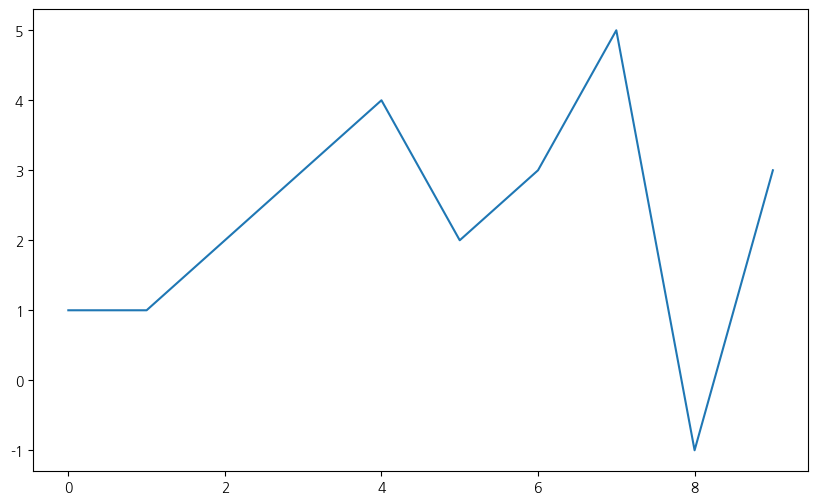

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(10)), [1,1,2,3,4,2,3,5,-1,3])
plt.show()

In [153]:
t = np.arange(0, 12, 0.01)
y = np.sin(t)

- label 설정
- legend : 범주

In [156]:
def drawGraph():
    plt.figure(figsize=(10, 6))
    plt.plot(t, np.sin(t), label='sin')
    plt.plot(t, np.cos(t), label='cos')
    plt.grid()
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Example of sinwave')
    plt.show()

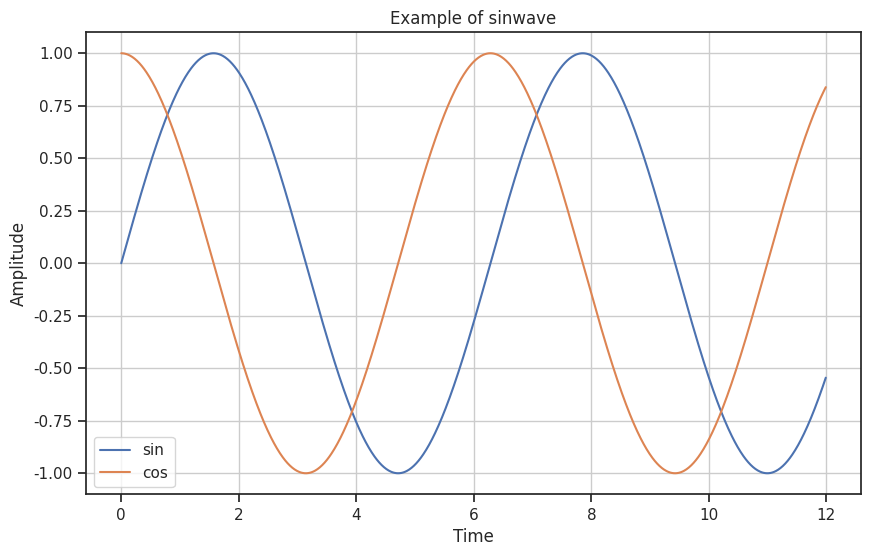

In [157]:
drawGraph()

## Marker

In [166]:
t = np.arange(0, 5, 0.5)

def drawGraph2():
    plt.figure(figsize=(10, 6))
    plt.plot(t, t, 'r--') 
    plt.plot(t, t**2, 'bs')
    plt.plot(t, t**3, 'g^')
    plt.show()

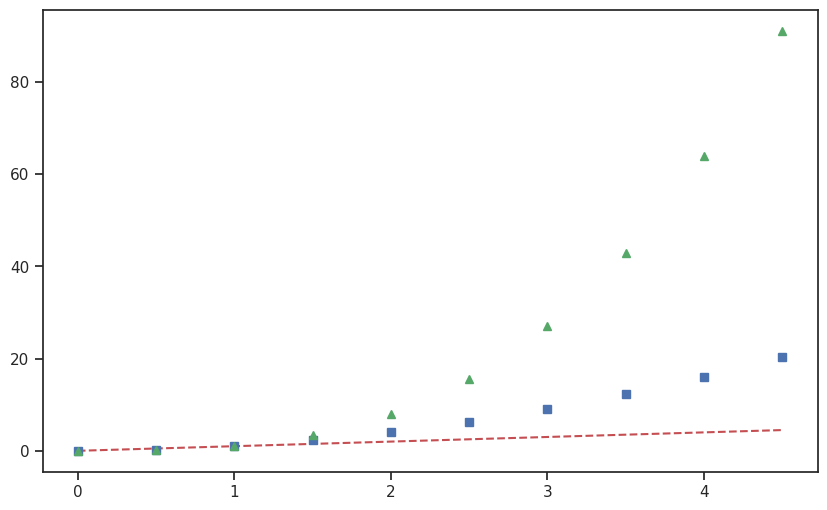

In [167]:
drawGraph2()

In [52]:
t = list(range(7))
y = [1,4,5,8,9,5,3]

def drawGraph3():
    plt.figure(figsize=(10, 6))
    plt.plot(t, y, color='green', linestyle='dashed',
             marker='o', markerfacecolor='blue', markersize=12)
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()

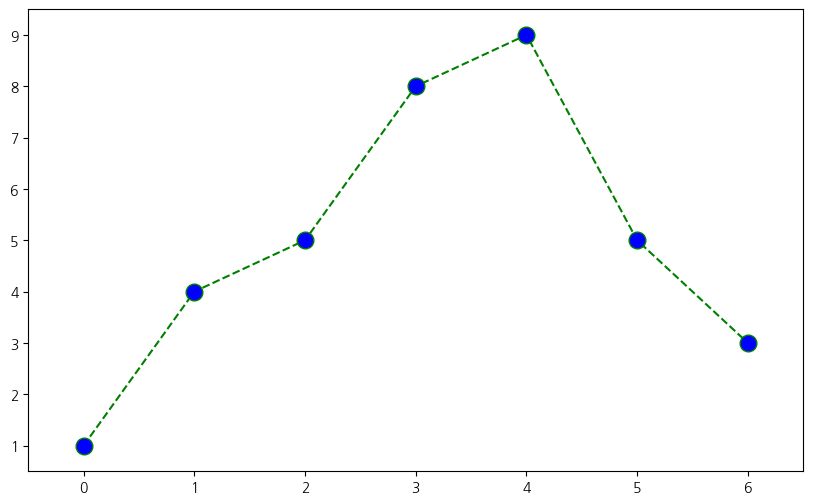

In [53]:
drawGraph3()

## Scatter

In [54]:
t = np.array(list(range(10)))
y = np.array([9,8,7,9,8,3,2,4,3,4])

def drawGraph4():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()

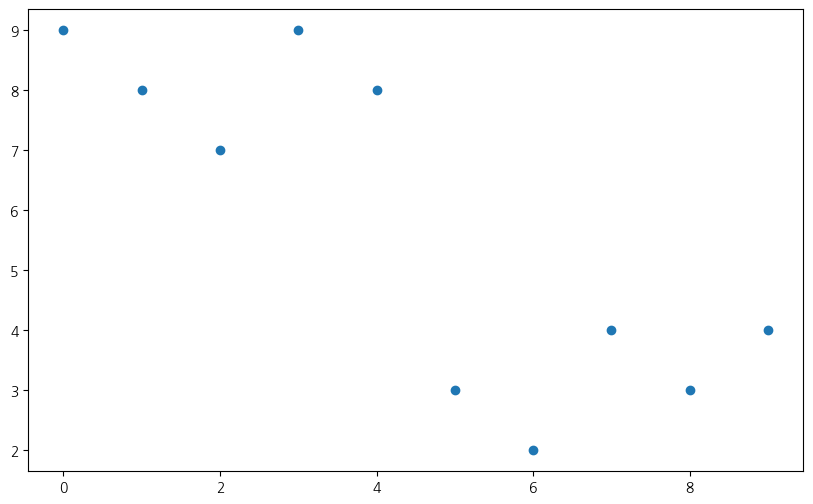

In [55]:
drawGraph4()

In [56]:
colormap = t

def drawGraph5():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s=50, c=colormap, marker='>')
    plt.colorbar()
    plt.show()

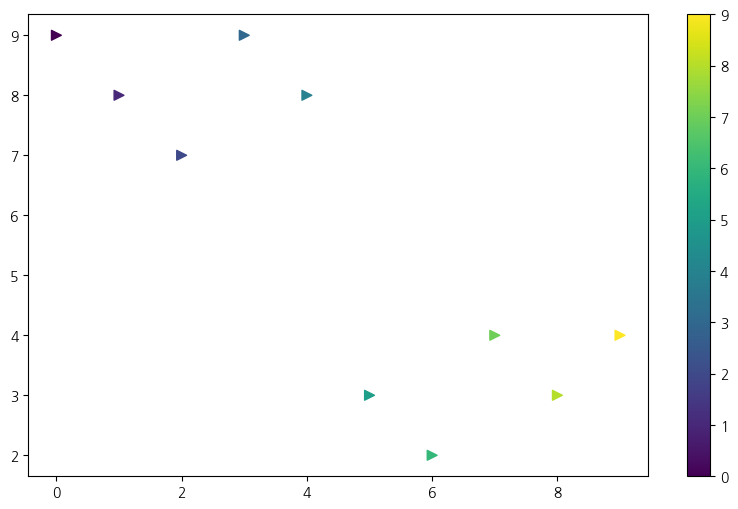

In [57]:
drawGraph5()

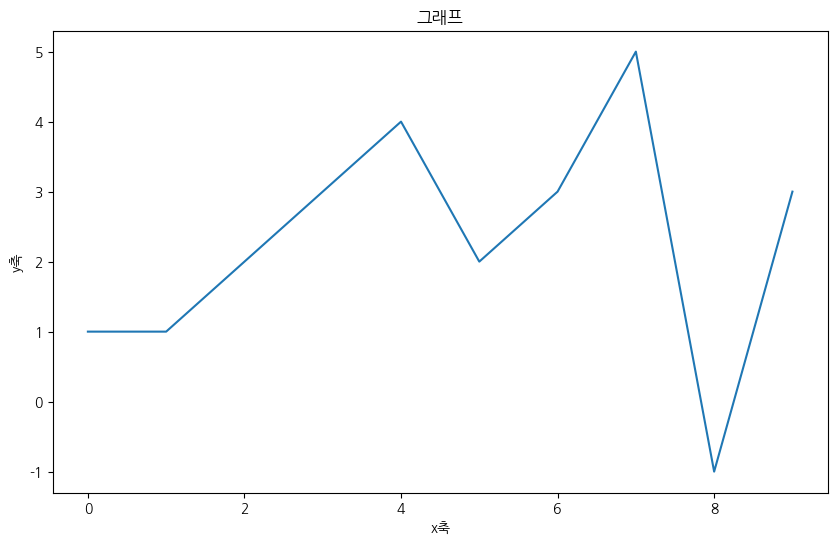

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(10)), [1,1,2,3,4,2,3,5,-1,3])
plt.xlabel('x축')
plt.ylabel('y축')
plt.title('그래프')
plt.show()

## Box Plot

<center><image src=./../images/Boxplot.png width='700' height='500'><center>

- 데이터 생성

In [60]:
samples = [1,7,9,16,36,39,45,45,46,48,51,100,101]
tmp_y = [1]*len(samples)
tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

- 데이터 시각화

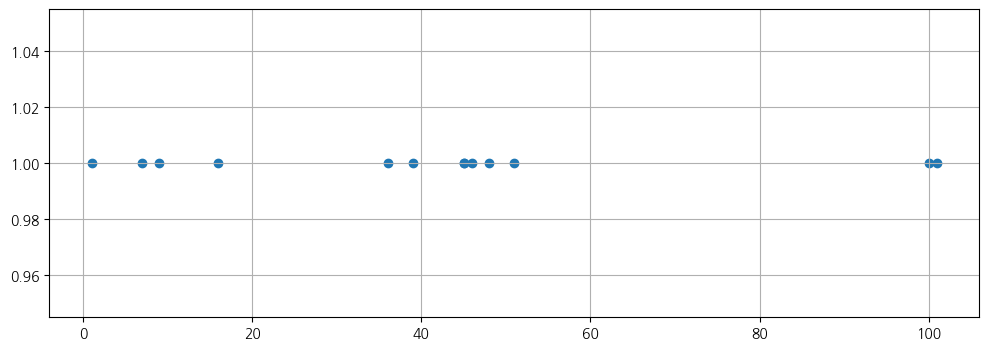

In [62]:
plt.figure(figsize=(12, 4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [66]:
# Median
print(np.median(samples))

# 25th percentile
print(np.percentile(samples, 25))

# 75th percentile
print(np.percentile(samples, 75))

# Interquartile Range (IQR)
print(np.percentile(samples, 75) - np.percentile(samples,25))

#1.5(IQR)
IQR = np.percentile(samples, 75) - np.percentile(samples,25)
print(IQR*1.5)

45.0
16.0
48.0
32.0
48.0


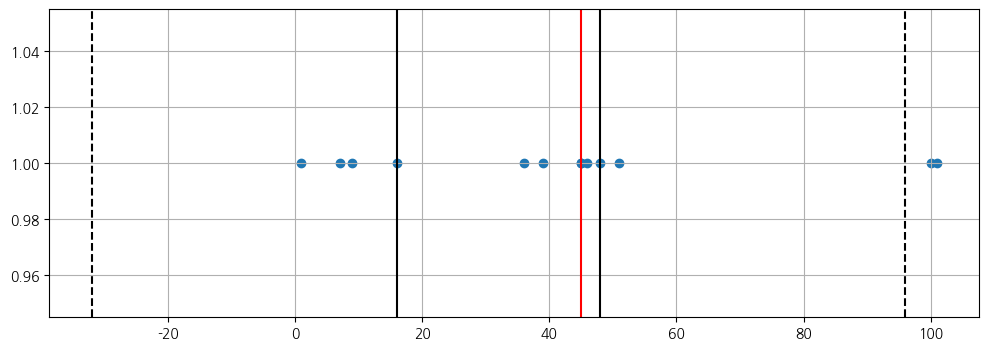

In [67]:
percentile_25 = np.percentile(samples, 25)
Median = np.median(samples)
percentile_75 = np.percentile(samples, 75)
upper_fence = percentile_75 + IQR*1.5
lower_fence = percentile_25 - IQR*1.5

plt.figure(figsize=(12, 4))
plt.scatter(samples, tmp_y)
plt.axvline(x=percentile_25, color='black')
plt.axvline(x=Median, color='red')
plt.axvline(x=percentile_75, color='black')
plt.axvline(x=upper_fence, color='black', ls='dashed')
plt.axvline(x=lower_fence, color='black', ls='dashed')
plt.grid()
plt.show()

- seaborn 맛보기

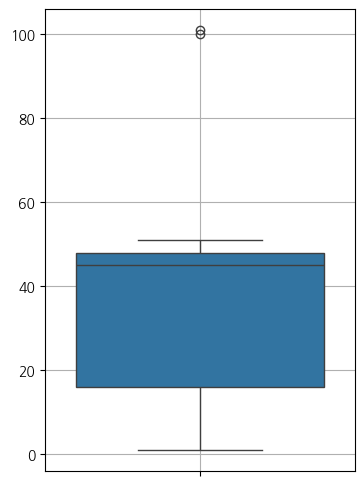

In [75]:
import seaborn as sns
plt.figure(figsize=(4,6))
sns.boxplot(samples)
plt.grid()
plt.show()

---

# 실습 1

## CCTV 증가율 계산

### 데이터 전처리

- 데이터 확인

In [1]:
import pandas as pd

In [2]:
cctv_seoul = pd.read_csv('./../data/Seoul_CCTV.csv', encoding='utf-8', index_col=0)
cctv_seoul.reset_index(drop=True, inplace=True)
cctv_seoul.drop([0], inplace=True)
cctv_seoul.head()

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405
4,성동구,4409,190.0,352.0,278,939,457,640,483,366,233,471
5,광진구,3828,309.0,95.0,42,666,460,712,191,740,273,340


In [3]:
# 데이터 오름차순, CCTV를 가장 적게 가진 지역 확인
cctv_seoul.sort_values(by='총계', ascending=True).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300
10,도봉구,2378,3.0,NaN,68,80,152,149,156,552,557,661
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135
11,노원구,3006,156.0,466.0,310,162,208,311,382,213,161,637
20,동작구,3024,534.0,124.0,245,270,299,312,433,28,372,407


In [4]:
# 데이터 내림차순, CCTV를 가장 많이 가진 지역 확인
cctv_seoul.sort_values(by='총계', ascending=False).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
23,강남구,7721,672.0,814.0,1280,981,735,787,913,505,588,446
21,관악구,5772,774.0,447.0,607,675,663,889,404,549,135,629
22,서초구,5395,227.0,552.0,514,1022,422,339,419,565,878,457
12,은평구,5027,524.0,317.0,493,361,579,979,386,520,481,387
17,구로구,5003,406.0,248.0,340,543,531,781,652,685,339,478


- 구역별 최근 증가율 계산 
  - (2023년 + 2022년 + 2021년) / 전체 합계 * 100 

- 하지만, Nan 값 때문에 이상하게 계산됨. --> 전처리 필요

In [5]:
cctv_seoul['최근증가율'] = (
    (cctv_seoul['2023년'] + cctv_seoul['2022년'] + cctv_seoul['2021년'])/
     cctv_seoul.iloc[:, 2:10].sum(axis=1) * 100
)

cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율
10,도봉구,2378,3.0,NaN,68,80,152,149,156,552,557,661,152.586207
18,금천구,3169,NaN,92.0,130,196,539,366,514,207,304,821,65.166341
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405,59.116022
15,양천구,4447,4.0,216.0,418,566,827,321,352,347,386,1010,57.128810
24,송파구,4031,223.0,183.0,126,227,526,1050,237,151,431,877,53.580610


- 데이터 타입 확인

In [6]:
cctv_seoul.iloc[:, 2:10].dtypes

2015년 이전 설치된 CCTV    float64
2015년                float64
2016년                  int64
2017년                  int64
2018년                  int64
2019년                  int64
2020년                  int64
2021년                  int64
dtype: object

In [7]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   구분                 25 non-null     object 
 1   총계                 25 non-null     int64  
 2   2015년 이전 설치된 CCTV  24 non-null     float64
 3   2015년              24 non-null     float64
 4   2016년              25 non-null     int64  
 5   2017년              25 non-null     int64  
 6   2018년              25 non-null     int64  
 7   2019년              25 non-null     int64  
 8   2020년              25 non-null     int64  
 9   2021년              25 non-null     int64  
 10  2022년              25 non-null     int64  
 11  2023년              25 non-null     int64  
 12  최근증가율              25 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 2.7+ KB


- 총계 부분 int 형으로 전환 (필요시)

In [8]:
cctv_seoul = cctv_seoul.astype(dtype={'총계':'int'},
                               errors='raise',
                               copy=True)
cctv_seoul

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300,40.305445
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135,28.250204
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405,59.116022
4,성동구,4409,190.0,352.0,278,939,457,640,483,366,233,471,28.879892
5,광진구,3828,309.0,95.0,42,666,460,712,191,740,273,340,42.083981
6,동대문구,3268,8.0,70.0,749,670,199,215,229,226,317,585,47.675402
7,중랑구,4512,334.0,145.0,153,170,215,1074,976,507,294,644,40.430890
8,성북구,4578,281.0,294.0,572,448,850,713,226,418,355,421,31.404524
9,강북구,3331,37.0,68.0,210,4,375,963,569,298,797,10,43.779715
10,도봉구,2378,3.0,NaN,68,80,152,149,156,552,557,661,152.586207


- int 형으로 전환하기 위해서는 데이터 형태가 숫자 형태로 이뤄저야함. 
  - ',' 삭제


(데이터가 정상적으로 입력되어 있어서 해당 코드를 실행하면 오류가 발생하여 주석처리함)

In [9]:
# cctv_seoul['총계'] = cctv_seoul['총계'].str.replace(',','')
# cctv_seoul

In [10]:
# convert_col_name = cctv_seoul.columns[2:-1].tolist()

# for name in convert_col_name:
#     cctv_seoul[name] = cctv_seoul[name].str.replace(',','')
# cctv_seoul

- fillna(Value)
  - Nan 값을 특정 Value 값으로 대체

In [11]:
cctv_seoul = cctv_seoul.fillna(0)
cctv_seoul

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율
1,종로구,2031,549.0,158.0,128,143,142,67,237,82,225,300,40.305445
2,중 구,2718,275.0,236.0,239,372,386,155,364,419,137,135,28.250204
3,용산구,3258,88.0,38.0,295,491,147,335,473,486,500,405,59.116022
4,성동구,4409,190.0,352.0,278,939,457,640,483,366,233,471,28.879892
5,광진구,3828,309.0,95.0,42,666,460,712,191,740,273,340,42.083981
6,동대문구,3268,8.0,70.0,749,670,199,215,229,226,317,585,47.675402
7,중랑구,4512,334.0,145.0,153,170,215,1074,976,507,294,644,40.430890
8,성북구,4578,281.0,294.0,572,448,850,713,226,418,355,421,31.404524
9,강북구,3331,37.0,68.0,210,4,375,963,569,298,797,10,43.779715
10,도봉구,2378,3.0,0.0,68,80,152,149,156,552,557,661,152.586207


- 모든 컬럼의 데이터 타입을 int형으로 변환

In [12]:
convert_col_name = cctv_seoul.columns[2:-1].tolist()

cctv_seoul = cctv_seoul.astype(dtype=dict(zip(convert_col_name, 
                                              ['int' for _ in range(len(convert_col_name))])),
                               errors='raise',
                               copy=True)

cctv_seoul.dtypes

구분                    object
총계                     int64
2015년 이전 설치된 CCTV      int64
2015년                  int64
2016년                  int64
2017년                  int64
2018년                  int64
2019년                  int64
2020년                  int64
2021년                  int64
2022년                  int64
2023년                  int64
최근증가율                float64
dtype: object

### 증가율 계산

In [13]:
cctv_seoul['2020년 이전'] = cctv_seoul.iloc[:, 2:9].sum(axis=1)
cctv_seoul.head()

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율,2020년 이전
1,종로구,2031,549,158,128,143,142,67,237,82,225,300,40.305445,1424
2,중 구,2718,275,236,239,372,386,155,364,419,137,135,28.250204,2027
3,용산구,3258,88,38,295,491,147,335,473,486,500,405,59.116022,1867
4,성동구,4409,190,352,278,939,457,640,483,366,233,471,28.879892,3339
5,광진구,3828,309,95,42,666,460,712,191,740,273,340,42.083981,2475


In [14]:
cctv_seoul['최근증가율'] = (
    (cctv_seoul['2023년'] + cctv_seoul['2022년'] + cctv_seoul['2021년'])/
    cctv_seoul['2020년 이전'] * 100
)
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율,2020년 이전
10,도봉구,2378,3,0,68,80,152,149,156,552,557,661,291.118421,608
3,용산구,3258,88,38,295,491,147,335,473,486,500,405,74.504553,1867
18,금천구,3169,0,92,130,196,539,366,514,207,304,821,72.509526,1837
16,강서구,3546,303,192,167,416,259,457,362,441,596,353,64.471243,2156
15,양천구,4447,4,216,418,566,827,321,352,347,386,1010,64.460059,2704


## 인구현황 데이터

### 데이터 전처리

In [15]:
pop_seoul = pd.read_excel("./../data/Seoul_Population.xlsx", 
                            header=2, usecols='B,D,G,J,N')

pop_seoul.head()

/home/sangbeom/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,동별(2),소계.1,소계.2,소계.3,소계.5
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462


In [16]:
pop_seoul.rename(columns={pop_seoul.columns[0]:'구분',
                          pop_seoul.columns[1]:'인구수',
                          pop_seoul.columns[2]:'한국인',
                          pop_seoul.columns[3]:'외국인',
                          pop_seoul.columns[4]:'고령자',},
                          inplace=True)
pop_seoul.head()

,구분,인구수,한국인,외국인,고령자
0,소계,9638799,9386034,252765,1743696
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462


- 데이터 전처리 시 오류를 줄이기 위한 데이터 타입 확인

In [17]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      26 non-null     object
 1   인구수     26 non-null     int64 
 2   한국인     26 non-null     int64 
 3   외국인     26 non-null     int64 
 4   고령자     26 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


- 필요없는 인덱스 제거
  - 총계는 포함하지 않음

In [18]:
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구분,인구수,한국인,외국인,고령자
1,종로구,150453,139417,11036,28764
2,중구,131793,121312,10481,25920
3,용산구,227106,213151,13955,39747
4,성동구,284766,277361,7405,49462
5,광진구,351180,335554,15626,56819


- CCVT 증가율과 가장 관련있는 데이터 비율 계산 정도? 

In [19]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,150453,139417,11036,28764,7.335181,19.118263
2,중구,131793,121312,10481,25920,7.952623,19.667205
3,용산구,227106,213151,13955,39747,6.144708,17.501519
4,성동구,284766,277361,7405,49462,2.600381,17.369349
5,광진구,351180,335554,15626,56819,4.449570,16.179452


In [20]:
pop_seoul.sort_values(by='인구수', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,660025,654166,5859,108894,0.887694,16.498466
16,강서구,568826,563058,5768,102096,1.014018,17.948547
23,강남구,550282,544873,5409,86606,0.982951,15.738476
11,노원구,502925,498213,4712,96422,0.936919,19.172242
21,관악구,497883,481956,15927,85418,3.198944,17.156240


In [21]:
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,415651,392405,23246,79984,5.592673,19.243067
19,영등포구,397800,374794,23006,67509,5.783308,16.970588
6,동대문구,359873,341149,18724,67030,5.202947,18.626015
21,관악구,497883,481956,15927,85418,3.198944,17.156240
5,광진구,351180,335554,15626,56819,4.449570,16.179452


In [22]:
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,660025,654166,5859,108894,0.887694,16.498466
16,강서구,568826,563058,5768,102096,1.014018,17.948547
11,노원구,502925,498213,4712,96422,0.936919,19.172242
12,은평구,470869,466770,4099,93817,0.870518,19.924225
23,강남구,550282,544873,5409,86606,0.982951,15.738476


In [23]:
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,131793,121312,10481,25920,7.952623,19.667205
1,종로구,150453,139417,11036,28764,7.335181,19.118263
3,용산구,227106,213151,13955,39747,6.144708,17.501519
19,영등포구,397800,374794,23006,67509,5.783308,16.970588
18,금천구,241105,227481,13624,45342,5.650650,18.805914


In [24]:
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구분,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,292977,288113,4864,68617,1.660199,23.420610
10,도봉구,309494,306948,2546,70436,0.822633,22.758438
7,중랑구,387470,382155,5315,78955,1.371719,20.377061
12,은평구,470869,466770,4099,93817,0.870518,19.924225
2,중구,131793,121312,10481,25920,7.952623,19.667205


### 데이터 병합

- cctv 증가율과 인구 증가율을 한눈에 알아보기 위한 작업

In [25]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구분')
data_result.head()

,구분,총계,2015년 이전 설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,최근증가율,2020년 이전,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,2031,549,158,128,143,142,67,237,82,225,300,42.626404,1424,150453,139417,11036,28764,7.335181,19.118263
1,용산구,3258,88,38,295,491,147,335,473,486,500,405,74.504553,1867,227106,213151,13955,39747,6.144708,17.501519
2,성동구,4409,190,352,278,939,457,640,483,366,233,471,32.045523,3339,284766,277361,7405,49462,2.600381,17.369349
3,광진구,3828,309,95,42,666,460,712,191,740,273,340,54.666667,2475,351180,335554,15626,56819,4.449570,16.179452
4,동대문구,3268,8,70,749,670,199,215,229,226,317,585,52.710280,2140,359873,341149,18724,67030,5.202947,18.626015


- 필요없는 데이터 삭제

In [26]:
convert_col_name.append('2020년 이전')
for name in convert_col_name:
    del data_result[name]

data_result

,구분,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263
1,용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519
2,성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349
3,광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452
4,동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015
5,중랑구,4512,47.114444,387470,382155,5315,78955,1.371719,20.377061
6,성북구,4578,35.283688,438168,425602,12566,80414,2.867850,18.352321
7,강북구,3331,49.640611,292977,288113,4864,68617,1.660199,23.420610
8,도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438
9,노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242


- 인덱스를 숫자가 아닌 '구분'을 기준으로 인덱스를 세움

In [27]:
data_result.set_index('구분', inplace=True)
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구분,,,,,,,,
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349
광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452
동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015


- corr
  - 데이터 상관계수 계산

In [28]:
data_result.corr()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
총계,1.000000,-0.389634,0.515071,0.506939,0.011125,0.390886,-0.281848,-0.407778
최근증가율,-0.389634,1.000000,-0.189394,-0.170818,-0.300959,-0.041921,-0.197810,0.491636
인구수,0.515071,-0.189394,1.000000,0.998710,-0.254565,0.938019,-0.646220,-0.327598
한국인,0.506939,-0.170818,0.998710,1.000000,-0.303334,0.941830,-0.680469,-0.310758
외국인,0.011125,-0.300959,-0.254565,-0.303334,1.000000,-0.334416,0.832743,-0.229320
고령자,0.390886,-0.041921,0.938019,0.941830,-0.334416,1.000000,-0.713093,0.009966
외국인비율,-0.281848,-0.197810,-0.646220,-0.680469,0.832743,-0.713093,1.000000,-0.099945
고령자비율,-0.407778,0.491636,-0.327598,-0.310758,-0.229320,0.009966,-0.099945,1.000000


In [29]:
data_result['CCTV ratio'] = data_result['총계'] / data_result['인구수'] * 100
data_result.sort_values(by='CCTV ratio', ascending=False).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio
구분,,,,,,,,,
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519,1.434572
강남구,7721,24.894856,550282,544873,5409,86606,0.982951,15.738476,1.403099
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263,1.349923
금천구,3169,72.509526,241105,227481,13624,45342,5.650650,18.805914,1.314365


In [30]:
data_result.sort_values(by='CCTV ratio', ascending=True).head(5)

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio
구분,,,,,,,,,
노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242,0.597703
송파구,4031,56.726283,660025,654166,5859,108894,0.887694,16.498466,0.610734
강서구,3546,64.471243,568826,563058,5768,102096,1.014018,17.948547,0.623389
강동구,3549,39.340400,463318,459167,4151,82984,0.895929,17.910809,0.765997
도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438,0.768351


## 데이터 시각화

In [31]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np
data_result.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio
구분,,,,,,,,,
종로구,2031,42.626404,150453,139417,11036,28764,7.335181,19.118263,1.349923
용산구,3258,74.504553,227106,213151,13955,39747,6.144708,17.501519,1.434572
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289
광진구,3828,54.666667,351180,335554,15626,56819,4.449570,16.179452,1.090039
동대문구,3268,52.710280,359873,341149,18724,67030,5.202947,18.626015,0.908098


### 막대 그래프

- 결과 시각화

<Axes: ylabel='구분'>

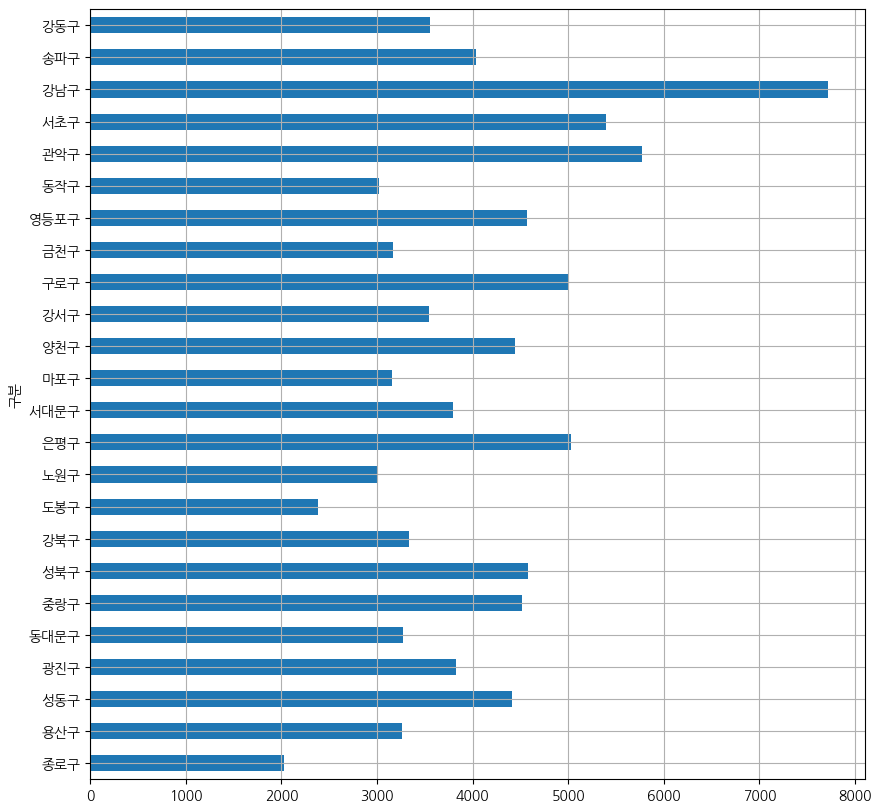

In [32]:
data_result['총계'].plot(kind='barh', grid=True, figsize=(10, 10))

- 정렬

In [33]:
def drawGraph6():
    data_result['총계'].sort_values().plot(
        kind='barh', grid=True, 
        title='가장 CCTV가 많은 구', 
        figsize=(10, 10))

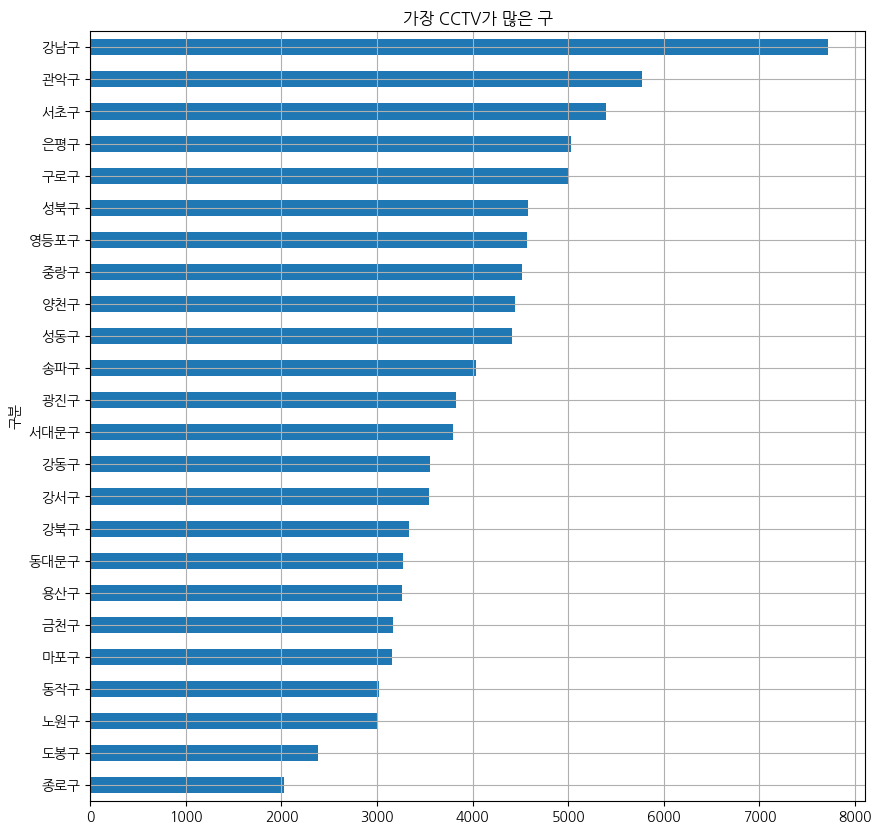

In [34]:
drawGraph6()

### 데이터 경향 분석

In [35]:
def drawGraph7():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['총계'], s=50)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

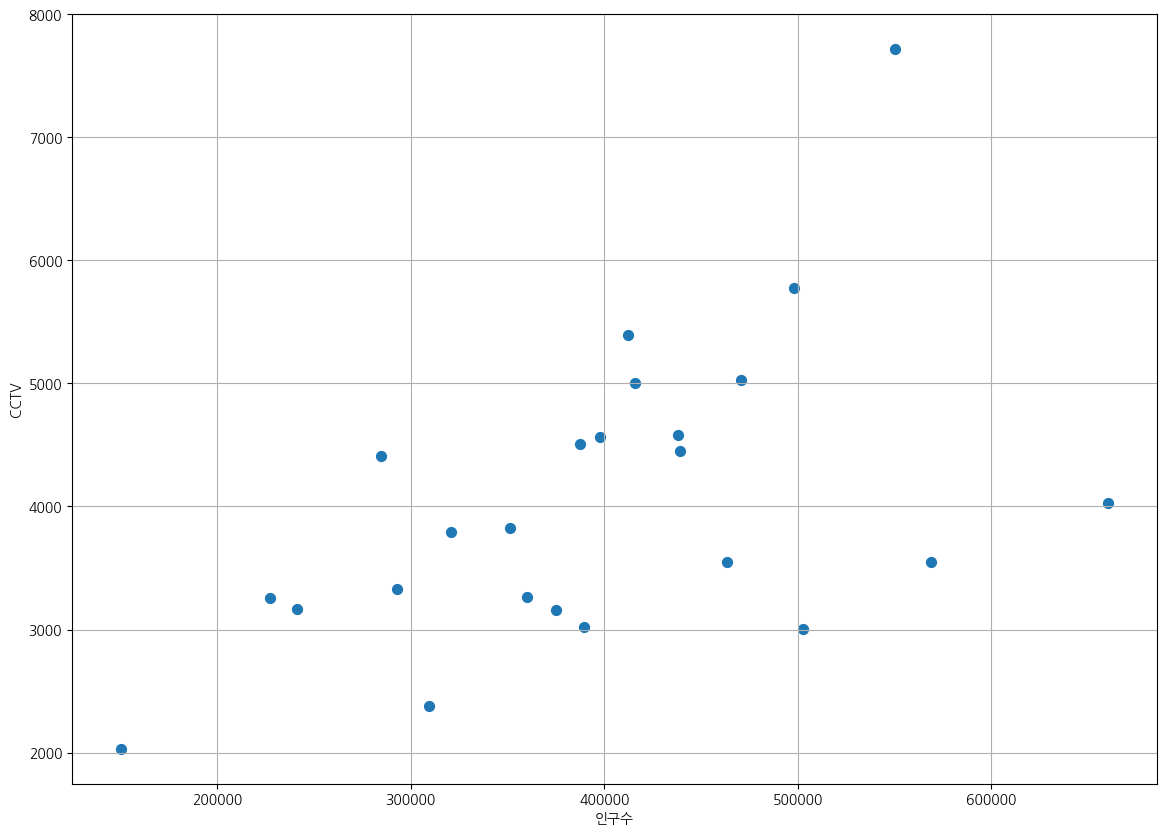

In [36]:
drawGraph7()

- 데이터를 간단하게 표현하는 1차원 직선 그래프 생성
  - 기울기, bias

In [37]:
fp1 = np.polyfit(data_result['인구수'], data_result['총계'], 1)
fp1

array([5.38244525e-03, 1.90108586e+03])

- np.poly1d()
  - 직선 함수화

In [38]:
f1 = np.poly1d(fp1)

In [39]:
f1(400000)

np.float64(4054.06396305776)

- 그래프 그리기

In [40]:
# 함수에 입력할 연속 데이터 생성 (100000 부터 700000 까지를 100등분 하는 linear space 생성)
fx = np.linspace(100000, 700000, 100)

In [41]:
def drawGraph8():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['총계'], s=50)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.grid()
    plt.show()

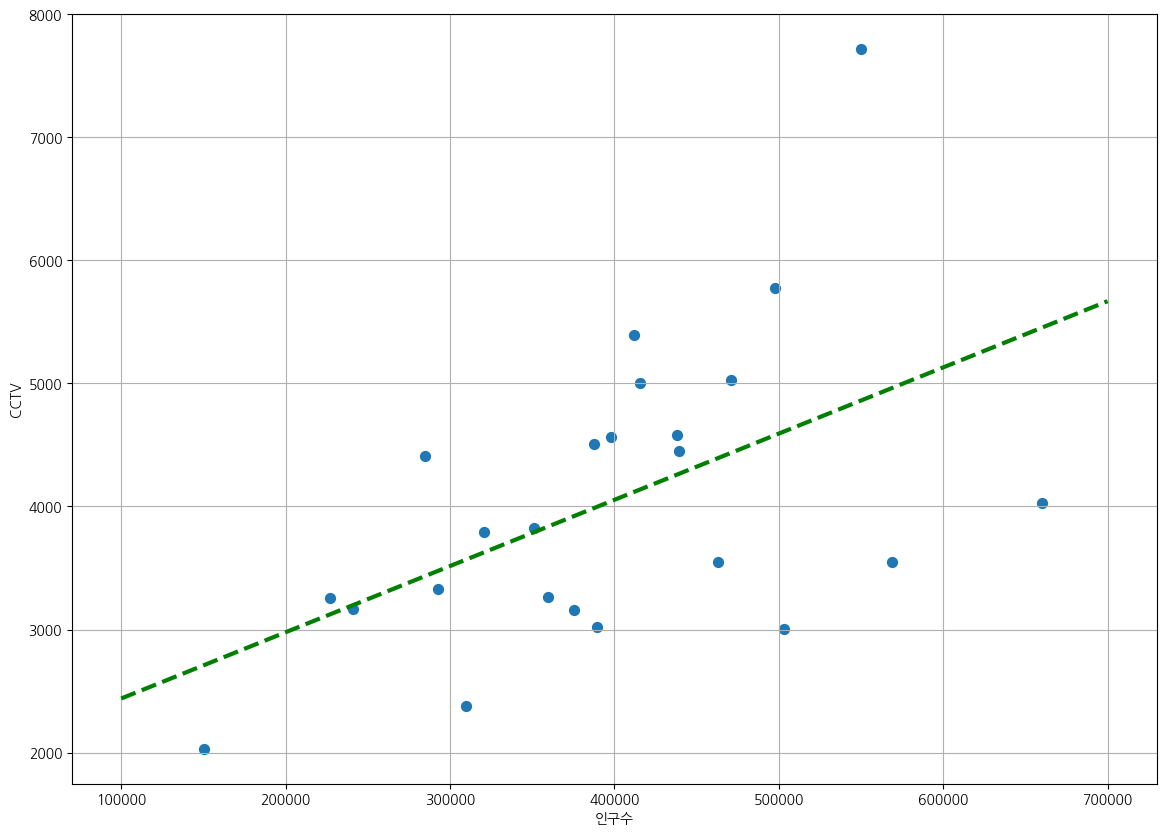

In [42]:
drawGraph8()

### 데이터 결과 분석 및 저장

In [43]:
data_result['오차'] = data_result['총계'] - f1(data_result['인구수'])

In [44]:
df_descending = data_result.sort_values(by='오차', ascending=False)
df_ascending = data_result.sort_values(by='오차', ascending=True)

In [45]:
df_descending.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio,오차
구분,,,,,,,,,,
강남구,7721,24.894856,550282,544873,5409,86606,0.982951,15.738476,1.403099,2858.051400
서초구,5395,54.363376,412078,407664,4414,65661,1.071156,15.934119,1.309218,1275.926863
관악구,5772,29.446064,497883,481956,15927,85418,3.198944,17.156240,1.159309,1191.086149
성동구,4409,32.045523,284766,277361,7405,49462,2.600381,17.369349,1.548289,975.176733
구로구,5003,42.902028,415651,392405,23246,79984,5.592673,19.243067,1.203654,864.695386


In [46]:
df_ascending.head()

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV ratio,오차
구분,,,,,,,,,,
노원구,3006,50.676692,502925,498213,4712,96422,0.936919,19.172242,0.597703,-1602.052140
송파구,4031,56.726283,660025,654166,5859,108894,0.887694,16.498466,0.610734,-1422.634289
강서구,3546,64.471243,568826,563058,5768,102096,1.014018,17.948547,0.623389,-1416.760664
도봉구,2378,291.118421,309494,306948,2546,70436,0.822633,22.758438,0.768351,-1188.920373
동작구,3024,36.400541,389714,378769,10945,70474,2.808470,18.083518,0.775954,-974.700131


In [57]:
from matplotlib.colors import ListedColormap

# Hex color code 검색 후 사용
color_step = ["#ff2d00", "#ff9e00", "#9f00ff", "#67ff00", "#0018ff"]
my_colormap = ListedColormap(color_step)

In [58]:
import matplotlib.cm as cm
def drawGraph9():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result['인구수'], data_result['총계'], c=data_result['오차'],
                s=50, cmap=my_colormap)
    plt.plot(fx, f1(fx), ls='dashed', lw=3, color='gray')

    for n in range(5):
        # 데이터에 대한 설명을 할 때, 점과 글자가 겹치지 않도록 글자의 위치를 약간 수정하는 과정
        plt.text(df_descending['인구수'].iloc[n]*1.02,
                 df_descending['총계'].iloc[n]*0.98,
                 df_descending.index[n], fontsize=15)
        plt.text(df_ascending['인구수'].iloc[n]*1.02,
                 df_ascending['총계'].iloc[n]*0.98,
                 df_ascending.index[n], fontsize=15)
    plt.xlabel('인구수')
    plt.ylabel('CCTV')
    plt.colorbar()
    plt.grid()
    plt.show()

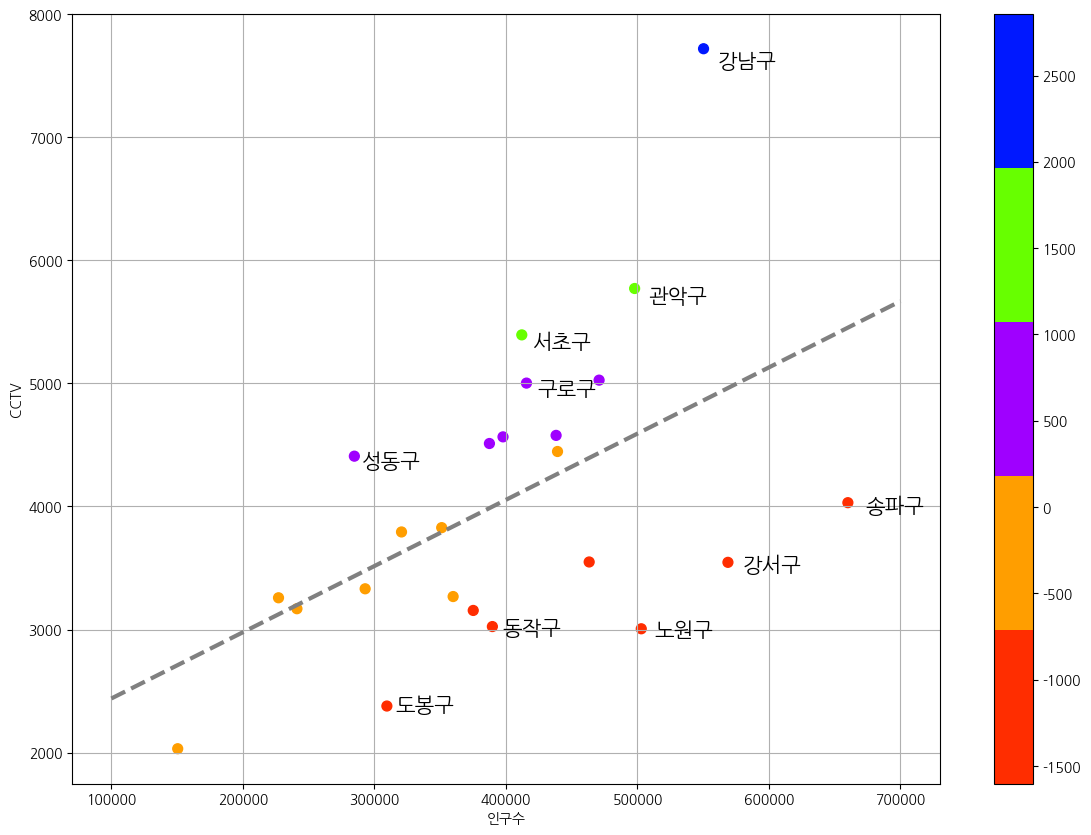

In [59]:
drawGraph9()

In [50]:
data_result.to_csv('./../data/CCTV_result.csv', sep=',', encoding='utf-8')

---

# 3. Seaborn 기초

## Seaborn 기초

- seaborn은 matplotlib를 백앤드로 하고 동작함.

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [79]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2*np.sin(x+0.5)
y3 = 3*np.sin(x+1.0)
y4 = 4*np.sin(x+1.5)

- plot 그리기

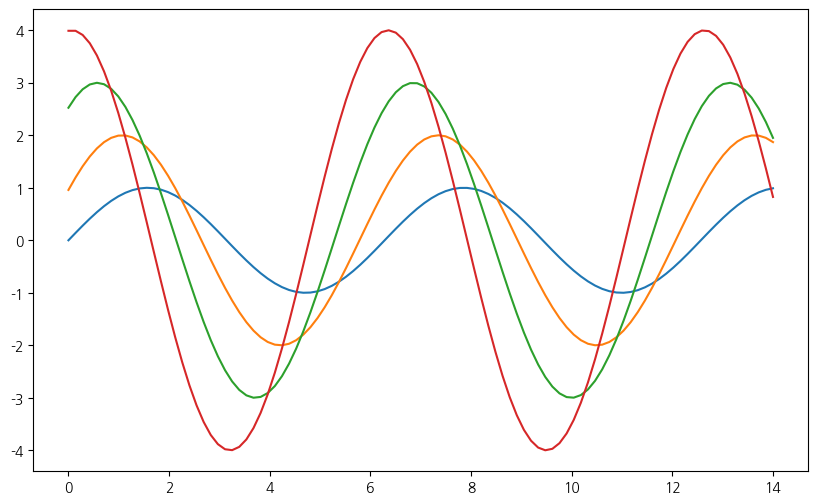

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

## set_style

- white

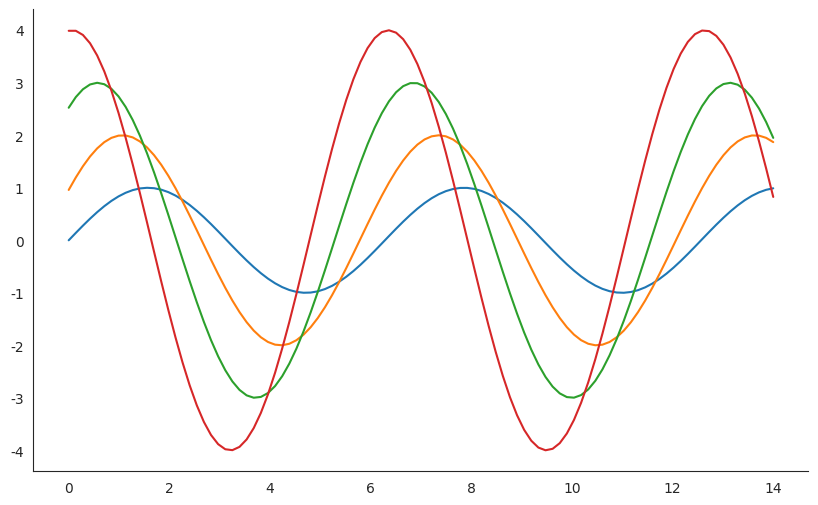

In [81]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine()
plt.show()

- dark

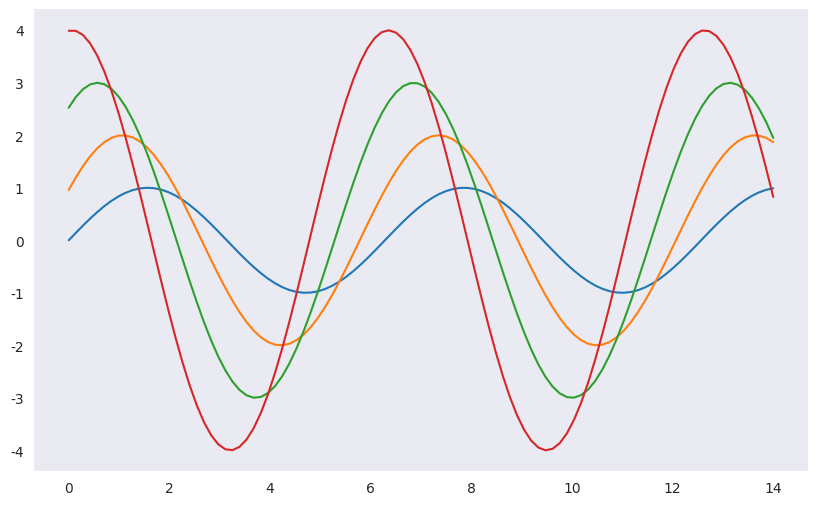

In [82]:
sns.set_style('dark')
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine()
plt.show()

- whitegrid

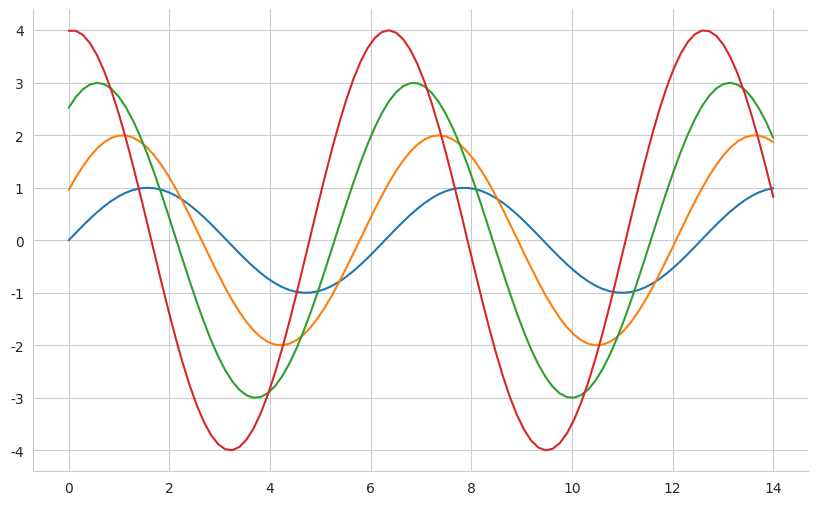

In [83]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine()
plt.show()

- despine(offset)
  - plot 디자인 조절

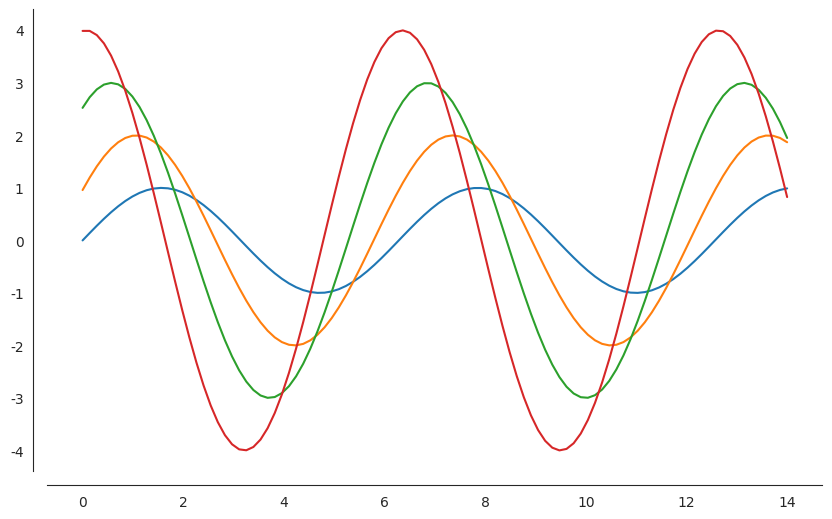

In [84]:
sns.set_style('white')
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine(offset=10)
plt.show()

## Box plot

In [85]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


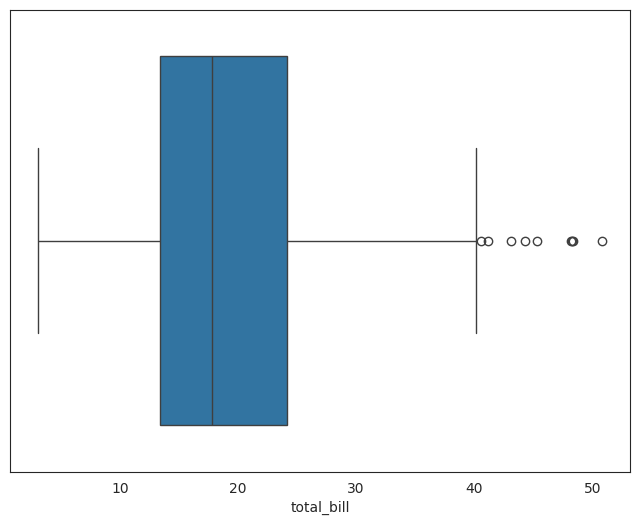

In [86]:
plt.figure(figsize=(8,6))
sns.boxplot(x=tips['total_bill'])
plt.show()

- palette
  - 데이터에 따라 다른 색상을 설정할 수 있음
  - Hue 값을 변수로 설정하여 변수의 종류에 따라 데이터 분석을 시각화 할 수 있음
    - x와 같은 값으로 설정할 시 데이터 분리가 일어나지 않음
- legend=True
  - 범례 표시

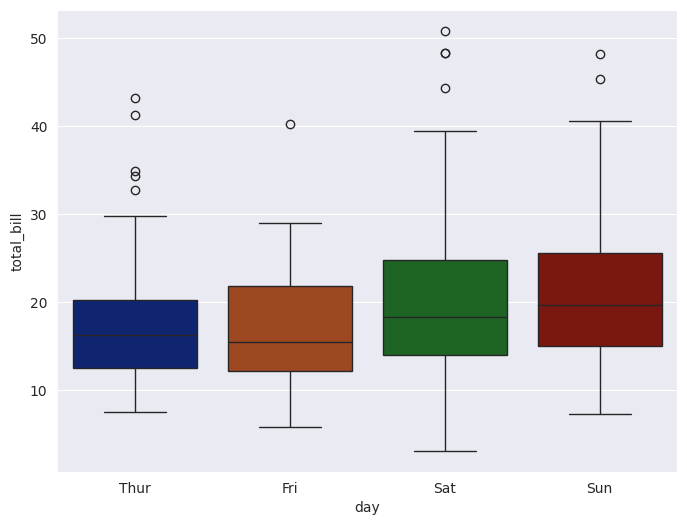

In [119]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips, hue='day', palette='dark')
plt.show()

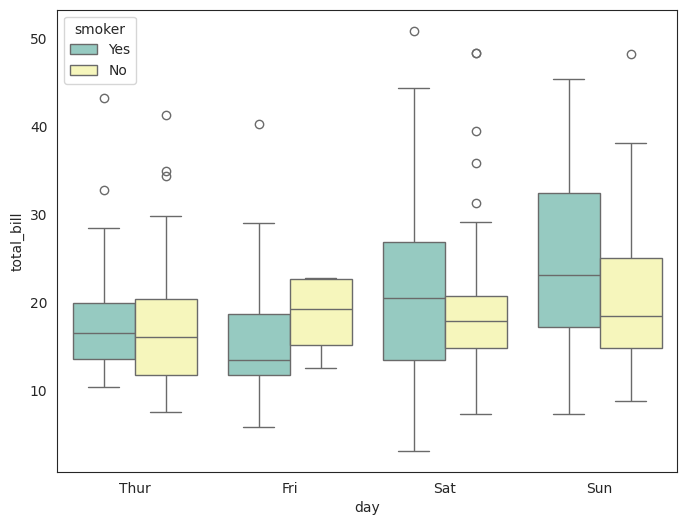

In [108]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker', palette='Set3')
plt.show()

- swarmplot
  - dot 형태로 본포 표시

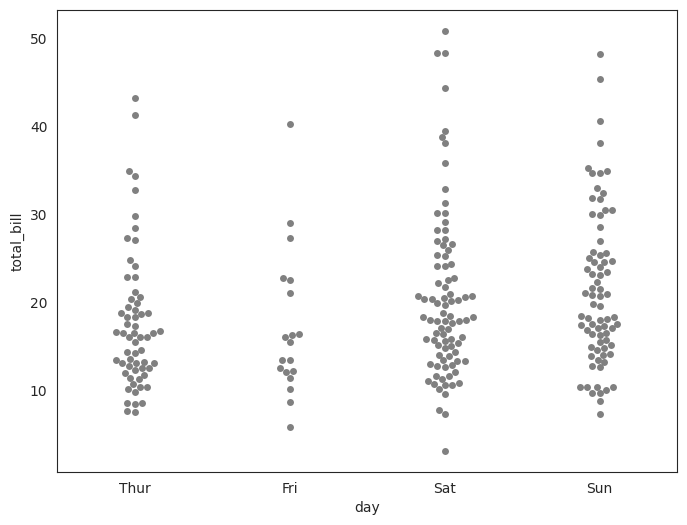

In [110]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='day', y='total_bill', data=tips, color='.5')
plt.show()

- plot 여러개 설정
  - 먼저 입력한 코드가 밑으로 내려가게 됨

/tmp/ipykernel_6920/1386373258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='dark')


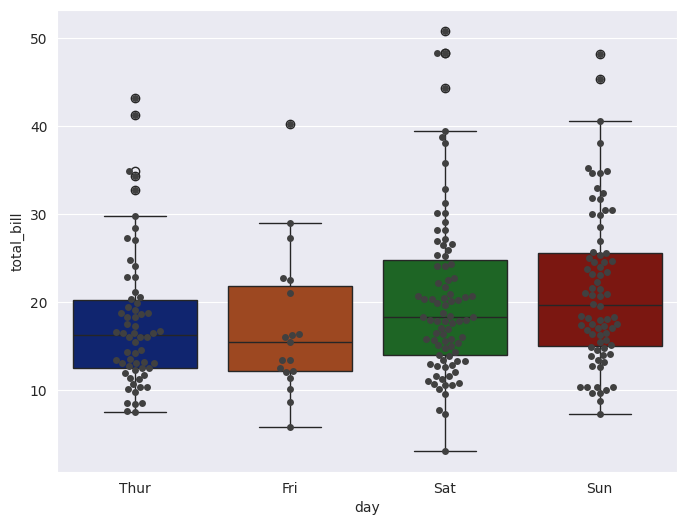

In [116]:
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='dark')
sns.swarmplot(x='day', y='total_bill', data=tips, color='.25')
plt.show()

## lmplot

- 앞서 plt를 통해 분석했던 과정을 sns.lmplot을 통해 간단하게 구현할 수 있음
- 마찬가지로, hue 값을 통해 데이터 타입에 따른 분석을 진행할 수 있음

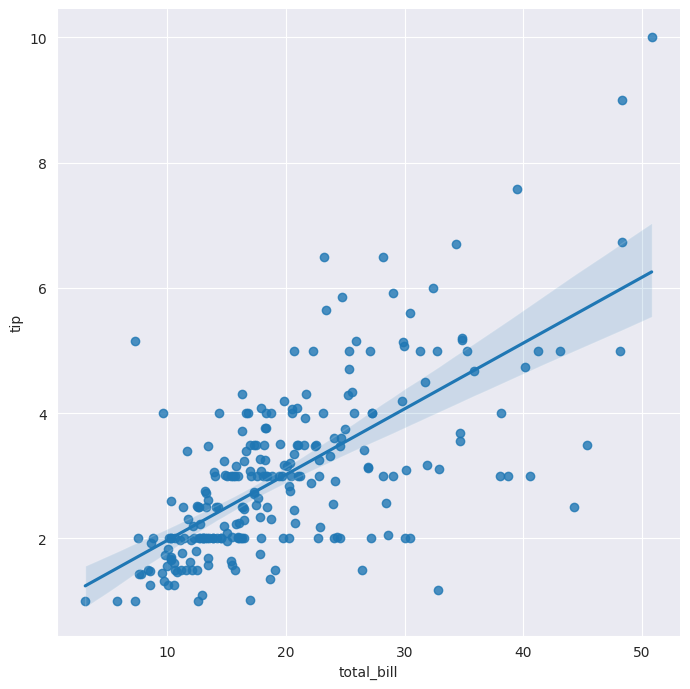

In [112]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill', y='tip', data=tips, height=7)
plt.show()

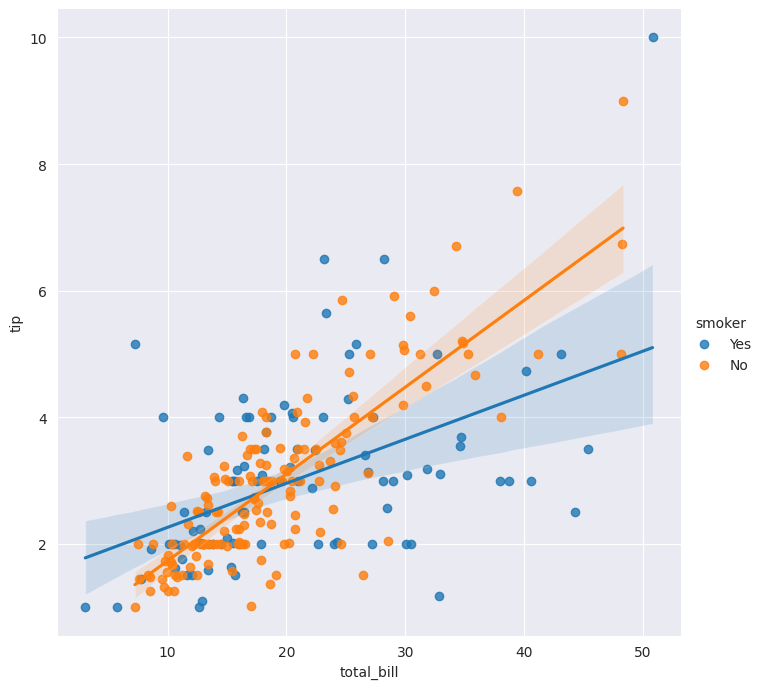

In [113]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, height=7)
plt.show()

## pivot

In [125]:
flights = sns.load_dataset('flights')
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [138]:
flights = flights.pivot(index='month', columns='year', values='passengers')
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


## hitmap

- heatmap
  - annot : annotation
  - fmt : format
  - cmap : color map

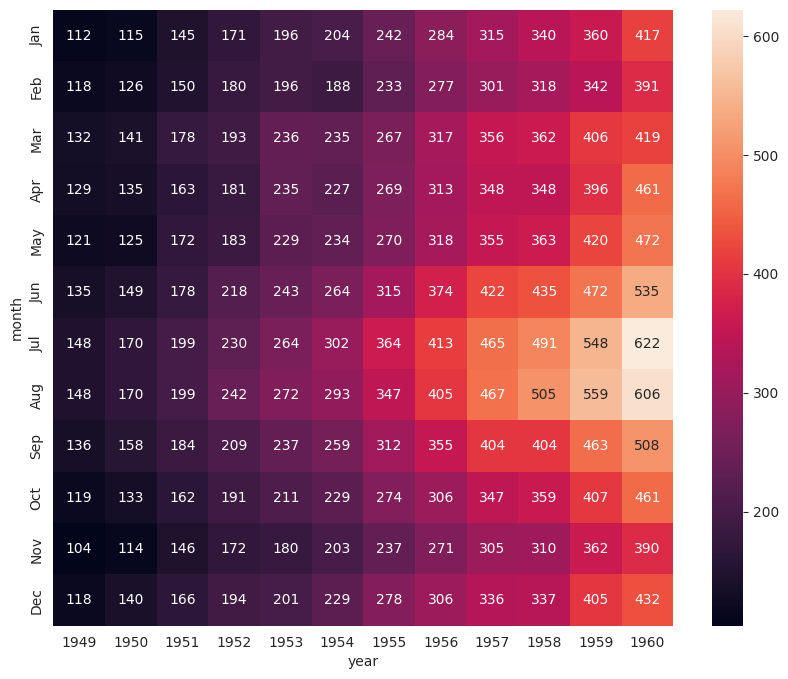

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d')
plt.show()

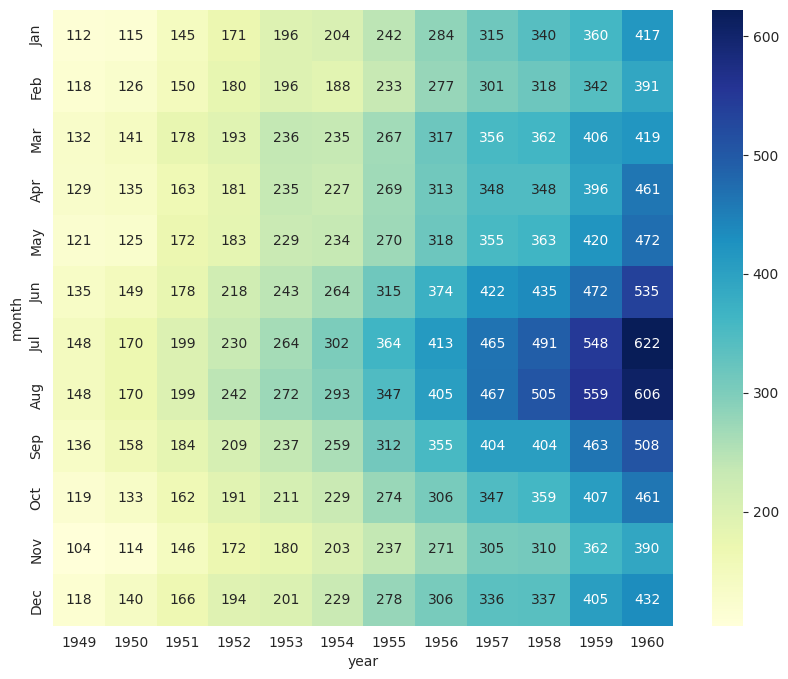

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

## Iris

- set_theme
  - Seaborn의 기본 설정을 변경하여 시각화를 통일된 스타일로 생성할 수 있도록 도와주는 함수
  - 그래프의 배경색, 그리드 라인, 폰트 등이 변경
  - 테마 목록
    - darkgrid, whitegrid, dark, white, ticks

In [150]:
sns.set_theme(style='ticks')
iris = sns.load_dataset('iris')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


- pairplot
  - 변수간 관계 확인
  - 매개변수 var를 통해 특정 변수간 관계를 확인할 수 있음 

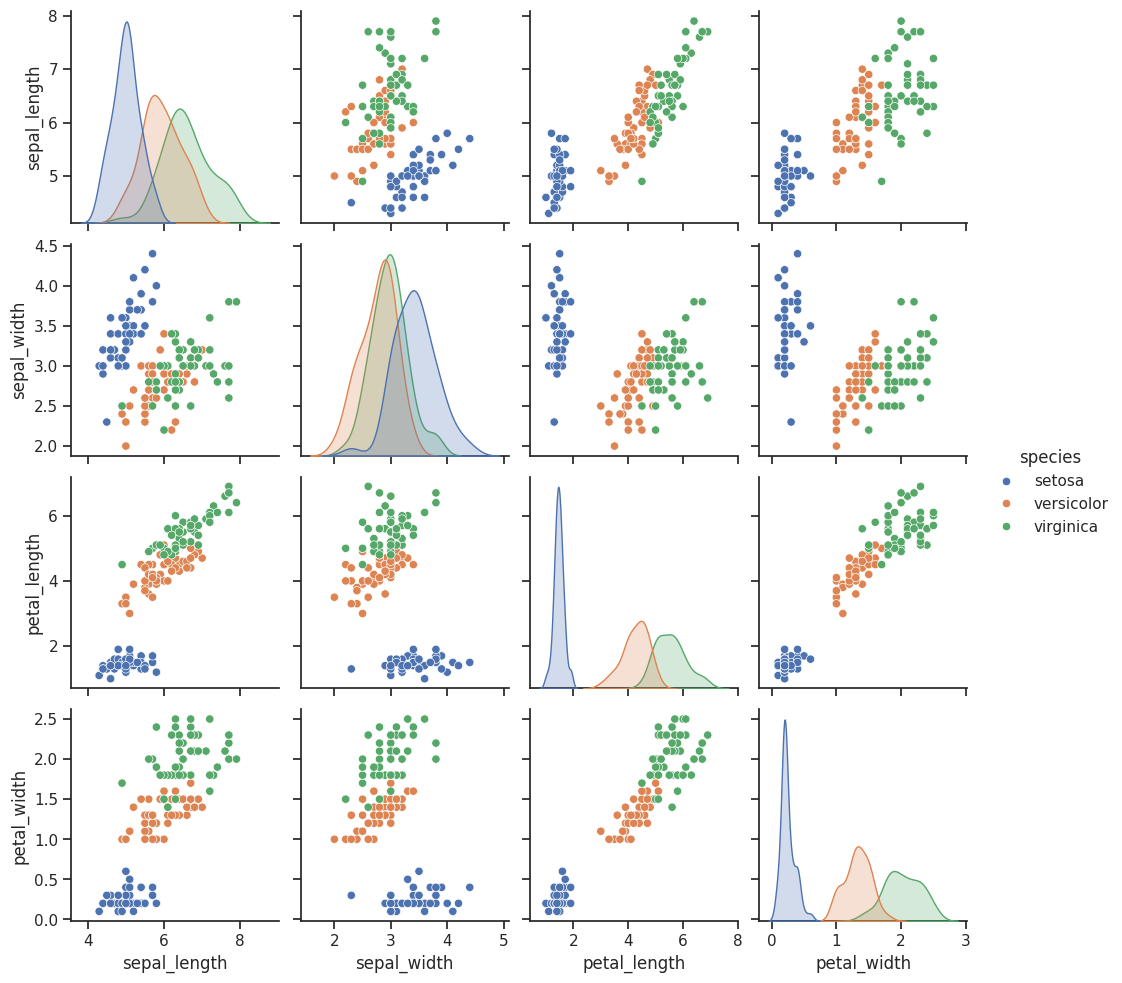

In [142]:
sns.pairplot(iris, hue='species')
plt.show()

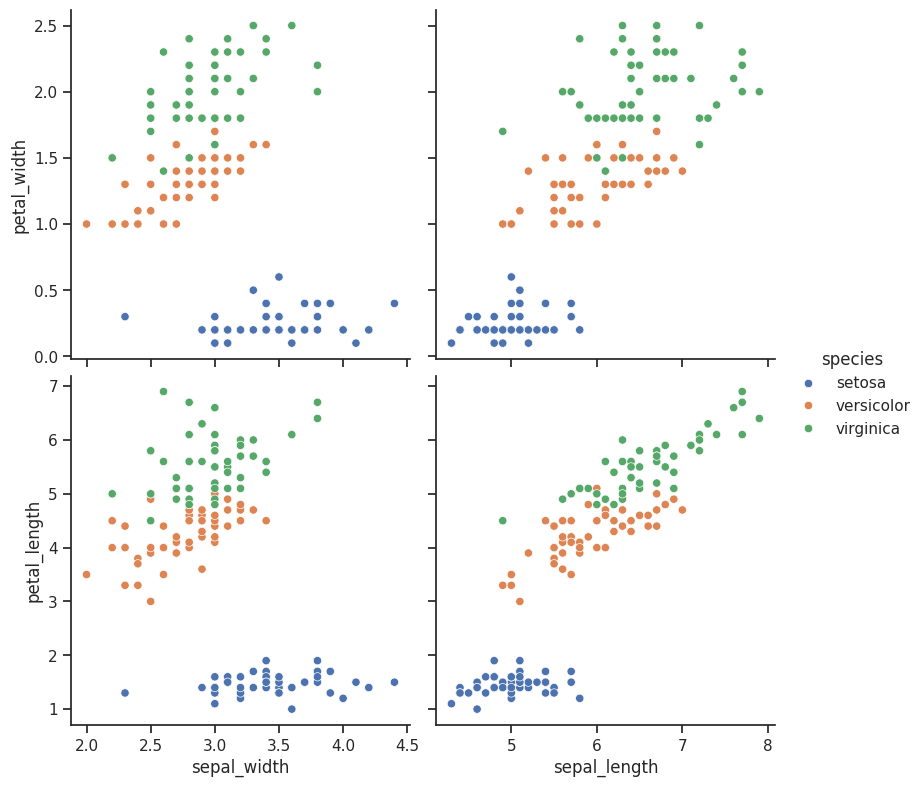

In [143]:
sns.pairplot(iris, 
             x_vars=['sepal_width', 'sepal_length'],
             y_vars=['petal_width', 'petal_length'],
             hue='species',
             height=4)
plt.show()

## Titanic

In [144]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- catplot
  - 카테고리 범주 확인

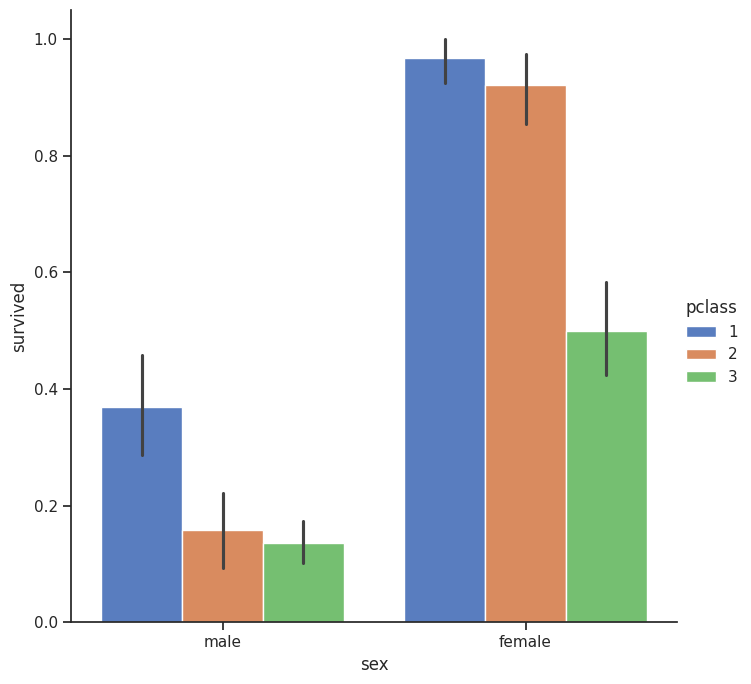

In [146]:
sns.catplot(x='sex', y='survived', hue='pclass', data=titanic, kind='bar',
            palette='muted', legend=True, height=7)
plt.show()

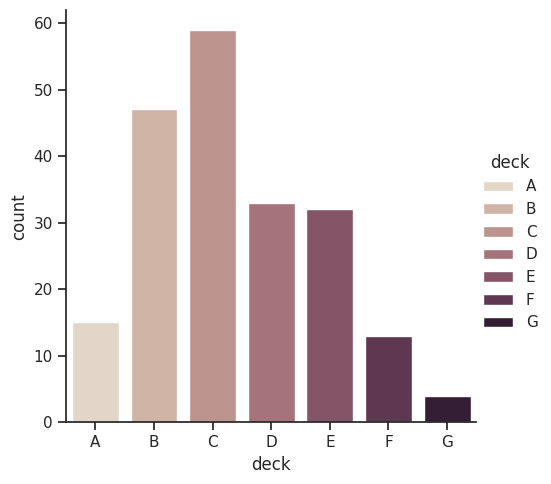

In [149]:
sns.catplot(x='deck', kind='count', hue='deck', palette='ch:.25', data=titanic)

---

# 4. Numpy 기초

## Numpy 불러오기

In [168]:
import numpy as np

- ones((row, col))
  - 값이 1인 행렬 생성
- zeros((row, col))
  - 값이 0인 행렬 생성
- eye(N)
  - NxN 크기의 Identity Matrix 생성

In [169]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [170]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [171]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

## 데이터 타입

- 데이터 생성

In [172]:
data1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
data1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

- shape
  - 행렬 크기 확인

In [250]:
# 3x3 행렬 크기 출력
data1.shape

(3, 3)

- astype
  - 행렬의 데이터 타입 변환
  - np.(dtype) 입력

In [174]:
# int --> float64 
data1 = data1.astype(np.float64)
data1

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

## 행렬 연산

- 덧셈/뺄셈 연산
  - 행렬간 연산일 경우 : 크기가 동일해야 함.
  - 행렬 + 숫자일 경우 : 행렬의 모든 값에 해당 숫자 값의 크기 만큼 더해짐.
- 곱/나눗셈/제곱 연산
  - Element-wise하게 연산 됨 (1대1 대응)

In [252]:
data1+3

array([[ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])

In [253]:
data1*data1

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

In [254]:
data1/3

array([[0.33333333, 0.66666667, 1.        ],
       [1.33333333, 1.66666667, 2.        ],
       [2.33333333, 2.66666667, 3.        ]])

In [255]:
1/data1

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667],
       [0.14285714, 0.125     , 0.11111111]])

In [179]:
data1**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974],
       [2.64575131, 2.82842712, 3.        ]])

In [180]:
data1**2

array([[ 1.,  4.,  9.],
       [16., 25., 36.],
       [49., 64., 81.]])

## Indexing

- arange(S, E, I)
  - S부터 E까지 I간격으로 배열 생성
  - list(range())와 동일

In [257]:
data2 = np.arange(10)
data2

array([1, 4, 7])

- index 조회

In [182]:
data2[0]

np.int64(0)

- scling

In [183]:
data2[1:4]

array([1, 2, 3])

- 2차원 행렬 조회

In [258]:
# 가장 안쪽의 괄호 부터 조회
data1[2]

array([7., 8., 9.])

- 2차원 행렬 slicing

In [261]:
# 처음부터 2번재 행까지 인덱싱
data1[:2]

array([[1., 2., 3.],
       [4., 5., 6.]])

In [260]:
# 처음 행부터 2번재 행까지 인덱싱
# 1번째 열부터 끝열 까지 인덱싱 
data1[:2, 1:]

array([[2., 3.],
       [5., 6.]])

## 조건문 인덱싱


In [186]:
# 데이터 생성
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will'], dtype='<U4')

In [187]:
data_names = np.random.randn(5,4)
data_names

array([[ 0.19856004,  0.64573995, -0.43723299, -0.54406627],
       [-0.60688826,  0.08494369, -0.87177772, -0.78898401],
       [ 0.40864908,  0.58249525, -0.76322216,  0.46143726],
       [-1.34613221, -1.11130022,  0.1118041 , -1.19647025],
       [-1.08857568,  2.77431307,  0.16395241,  0.5609502 ]])

In [188]:
names=='Bob'

array([ True, False, False,  True, False])

- names가 'Bob'인 인덱스의 값 출력


In [189]:
data_names[names=='Bob']

array([[ 0.19856004,  0.64573995, -0.43723299, -0.54406627],
       [-1.34613221, -1.11130022,  0.1118041 , -1.19647025]])

- names가 'Bob'인 인덱스의 값 출력 + 슬라이싱

In [190]:
data_names[names=='Bob', 2:]

array([[-0.43723299, -0.54406627],
       [ 0.1118041 , -1.19647025]])

- not 사용

In [262]:
# 아래 3개 결과는 동일 (위에 두 개를 쓰는 것을 권장함)

data_names[~(names=='Bob')]
# data_names[names!='Bob']
# data_names[names is not 'Bob']

array([[0.        , 0.08494369, 0.        , 0.        ],
       [0.40864908, 0.58249525, 0.        , 0.46143726],
       [0.        , 2.77431307, 0.16395241, 0.5609502 ]])

- or

In [264]:
mask = (names=='Bob')|(names=='Will')
mask

array([ True, False,  True,  True,  True])

In [196]:
data_names[mask]

array([[ 0.19856004,  0.64573995, -0.43723299, -0.54406627],
       [ 0.40864908,  0.58249525, -0.76322216,  0.46143726],
       [-1.34613221, -1.11130022,  0.1118041 , -1.19647025],
       [-1.08857568,  2.77431307,  0.16395241,  0.5609502 ]])

- 행렬 자체에 조건문 정의

In [197]:
data_names<0

array([[False, False,  True,  True],
       [ True, False,  True,  True],
       [False, False,  True, False],
       [ True,  True, False,  True],
       [ True, False, False, False]])

In [198]:
data_names[data_names<0] = 0
data_names

array([[0.19856004, 0.64573995, 0.        , 0.        ],
       [0.        , 0.08494369, 0.        , 0.        ],
       [0.40864908, 0.58249525, 0.        , 0.46143726],
       [0.        , 0.        , 0.1118041 , 0.        ],
       [0.        , 2.77431307, 0.16395241, 0.5609502 ]])

## 행렬 형태 변환 및 연산

- 데이터 생성

In [199]:
data_mat = np.arange(15)
data_mat

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [200]:
data_mat.shape

(15,)

- reshape((raw, col))
  - 반드시 행렬 내의 변수 갯수가 동일해야함

In [266]:
data_mat = data_mat.reshape((3,5))
data_mat

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [202]:
data_mat.shape

(3, 5)

- T
  - Transpose : 행과 열 전환

In [203]:
data_mat.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

- dot
  - 행렬의 곱 연산 (element-wise가 아님)

In [204]:
np.dot(data_mat, data_mat.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

## Meshgrid (참고)

In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
points = np.arange(-5, 5, 0.01)
print(len(points))
print(min(points))
print(max(points))

1000
-5.0
4.989999999999787


In [210]:
xs, ys = np.meshgrid(points, points)
print('xs\n', xs, end='\n\n')
print('ys\n', ys)

xs
 [[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]

ys
 [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [211]:
xs.shape, ys.shape

((1000, 1000), (1000, 1000))

In [212]:
z = np.sqrt(xs**2 + ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

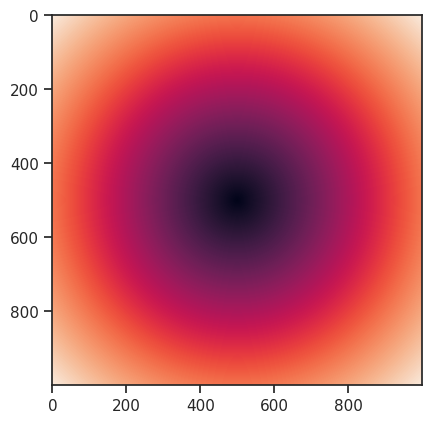

In [213]:
plt.imshow(z)

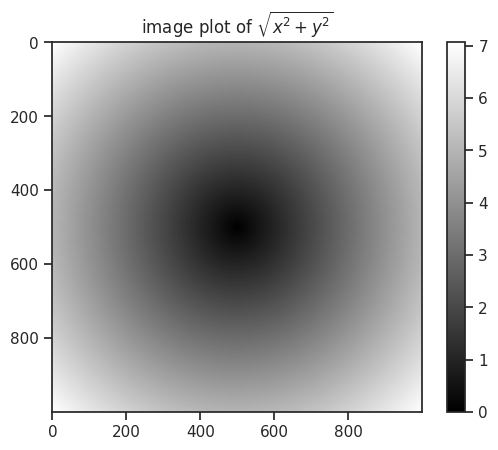

In [215]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title('image plot of $\sqrt{x^2 + y^2}$')
plt.show()

## Where 함수

In [216]:
x = np.array([1.1,1.2,1.3,1.4,1.5])
y = np.array([2.1,2.2,2.3,2.4,2.5])
condi = np.array([True, False, True, True, False])

- where(condition, val1, val2)
  - 배열의 각 변수에 접근하여 조건에 따라 값을 부여
  - val 값에는 값이나 배열이 들어와도 상관없음
  - True : val1
  - False : val2 

In [217]:
np.where(condi, x, y)

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [218]:
test = np.random.randn(4, 4)
test

array([[-0.75963854, -1.65509666, -0.69483185,  0.74772741],
       [-0.39568098,  0.16796122,  0.08365407, -0.68401968],
       [-0.73153177, -0.23956426,  1.24419914,  0.90802194],
       [-0.14186635, -0.08713185, -0.88328998, -0.4744241 ]])

In [219]:
np.where(test > 0, 2, -1)

array([[-1, -1, -1,  2],
       [-1,  2,  2, -1],
       [-1, -1,  2,  2],
       [-1, -1, -1, -1]])

In [220]:
np.where(test > 0, 2, test)

array([[-0.75963854, -1.65509666, -0.69483185,  2.        ],
       [-0.39568098,  2.        ,  2.        , -0.68401968],
       [-0.73153177, -0.23956426,  2.        ,  2.        ],
       [-0.14186635, -0.08713185, -0.88328998, -0.4744241 ]])

## Numpy 통계 

- numpy 함수 사용

In [221]:
np.mean(test)

np.float64(-0.22471951642012722)

- object 메서드 사용


In [223]:
test.mean()

np.float64(-0.22471951642012722)

In [224]:
test.sum()

np.float64(-3.5955122627220355)

- axis=0
  - raw 기준으로 계산
- axis=1
  - column 기준으로 게산

In [225]:
test.mean(axis=0)

array([-0.50717941, -0.45345789, -0.06256716,  0.12432639])

In [226]:
test.mean(axis=1)

array([-0.59045991, -0.20702134,  0.29528126, -0.39667807])

- std
  - 표준편차 계산

In [227]:
test.std()

np.float64(0.7162410275208017)

- var
  - 분산 계산

In [228]:
test.var()

np.float64(0.5130012095040538)

- min, max
  - 배열의 최소 최대치 출력

In [229]:
[test.min(), test.max()]

[np.float64(-1.655096662862826), np.float64(1.244199135398307)]

- argmin, argmax
    - 배열의 최소값, 최대값이 있는 인덱스 반환

In [230]:
[test.argmin(), test.argmax()]

[np.int64(1), np.int64(10)]

## 집합

In [231]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will'], dtype='<U4')

- unique
  - 고유값만 출력


In [232]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

- inqd
  - 배열 A에 B의 값이 포함되었는지 확인
  - B의 크기에 상관없이 연산이 진행됨

In [286]:
A = np.array([1,2,3,6])
B = np.array([1,6,8,9])

In [289]:
np.isin(A, B)

array([ True, False, False,  True])

- 조건부 인덱싱

In [288]:
A[np.isin(A, B)]

array([1, 6])

- 합집합

In [236]:
np.union1d(A, B)

array([1, 2, 3, 6, 8, 9])

- 교집합

In [237]:
np.intersect1d(A, B)

array([1, 6])

- 차집합

In [238]:
np.setdiff1d(A, B)

array([2, 3])

In [239]:
np.setdiff1d(B, A)

array([8, 9])

- XOR 집합

In [240]:
np.setxor1d(A, B)

array([2, 3, 8, 9])

## sympy 연산

In [241]:
import sympy as sym
a = sym.Rational(1, 2)
a

1/2

In [243]:
print(a*2)
print(a/2)

1
1/4


In [244]:
print(sym.oo > 9999)
print(sym.oo + 1)

True
oo


In [245]:
x = sym.Symbol('x')
y = sym.Symbol('y')

sym.expand((x + y)**3)

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [246]:
sym.simplify((x**2 - y**2)/(x + y))

x - y

In [247]:
sym.limit((2*x+10)/(x+1), x, sym.oo)

2

In [248]:
sym.diff(sym.sin(2*x),x)

2*cos(2*x)

In [249]:
sym.integrate(3*x**2, x)

x**3

# 실습 2 (서울시 운동을 하지 않는 이유 통계)

## 데이터 불러오기 및 데이터 확인

In [1]:
import pandas as pd

raw_data = pd.read_csv('./../data/report.csv', header=1)
print(raw_data.info())
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   기간                 52 non-null     int64  
 1   대분류                52 non-null     object 
 2   분류                 52 non-null     object 
 3   운동을 할 충분한 시간이 없어서  52 non-null     float64
 4   함께 운동을 할 사람이 없어서   52 non-null     float64
 5   운동을 할 만한 장소가 없어서   52 non-null     float64
 6   운동을 싫어해서           52 non-null     float64
 7   운동을 할 충분한 비용이 없어서  52 non-null     float64
 8   기타                 52 non-null     object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.8+ KB
None


,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,2019,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,2019,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,2019,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [2]:
raw_data[raw_data['대분류'] == '성별']

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,2019,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,2019,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7


In [3]:
raw_data.drop(['기간'], axis='columns').head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [4]:
raw_data.drop(['기간'], axis='columns', inplace=True)
raw_data.head()

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
0,서울시,소계,46.8,5.0,4.3,37.3,5.2,1.4
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7
3,연령별,10대,55.3,4.8,3.9,32.6,3.5,-
4,연령별,20대,46.0,4.2,4.5,38.8,6.4,0.1


In [5]:
raw_data = raw_data[raw_data['대분류'] == '성별']
raw_data

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
1,성별,남자,52.4,4.4,4.9,32.4,4.9,1.1
2,성별,여자,42.5,5.6,3.9,41.0,5.4,1.7


## polt.pie를 활용한 데이터 분포 확인

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
# from matplotlib import rc

# rc('font', family='Arial Unicode MS')

- explode
  - 데이터 구별을 위한 간격 설정

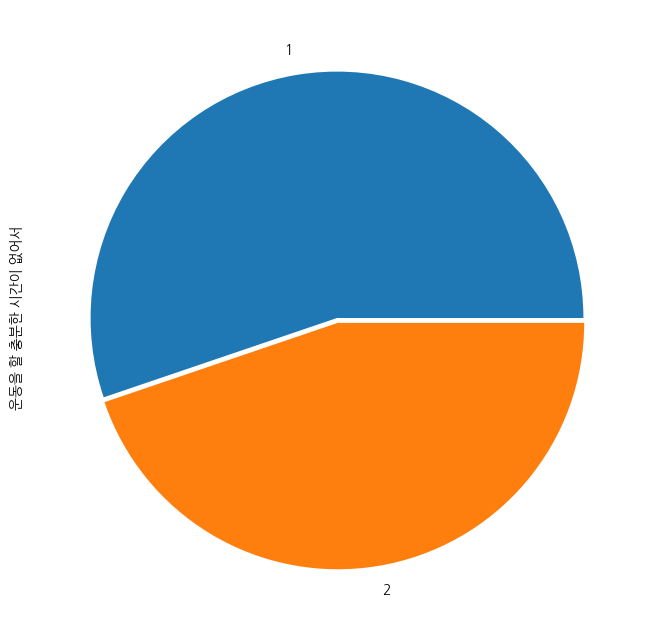

In [9]:
plt.figure(figsize=(10,8))
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

In [9]:
raw_data.set_index('분류', inplace=True)
raw_data.head()

,대분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,,
남자,성별,52.4,4.4,4.9,32.4,4.9,1.1
여자,성별,42.5,5.6,3.9,41.0,5.4,1.7


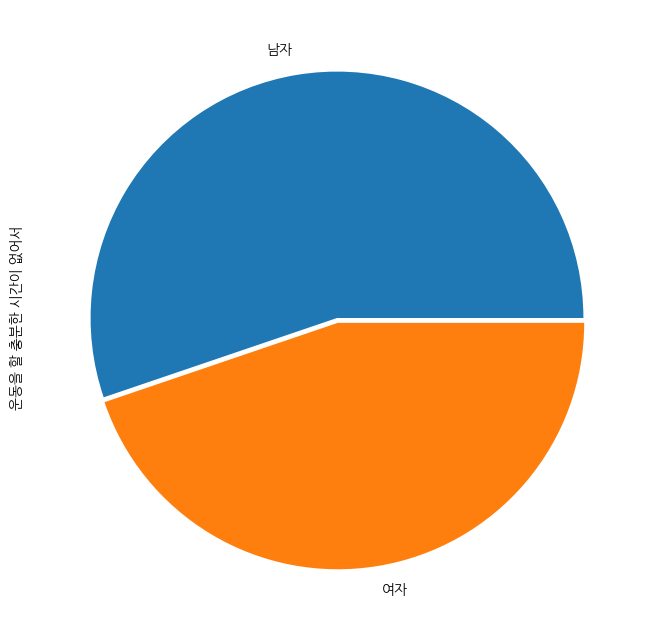

In [10]:
plt.figure(figsize=(10,8))
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

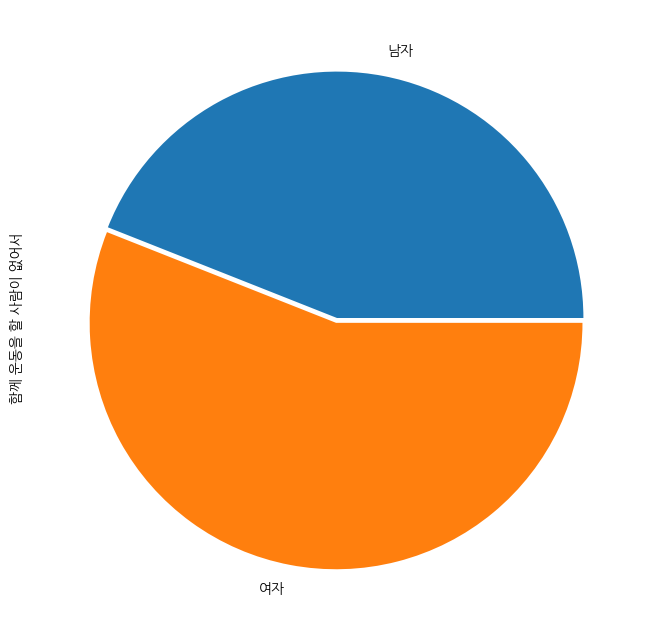

In [11]:
plt.figure(figsize=(10,8))
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

### 데이터 오류 처리과정 (필요시)

In [12]:
raw_data

,대분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,운동을 할 충분한 비용이 없어서,기타
분류,,,,,,,
남자,성별,52.4,4.4,4.9,32.4,4.9,1.1
여자,성별,42.5,5.6,3.9,41.0,5.4,1.7


In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 남자 to 여자
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   대분류                2 non-null      object 
 1   운동을 할 충분한 시간이 없어서  2 non-null      float64
 2   함께 운동을 할 사람이 없어서   2 non-null      float64
 3   운동을 할 만한 장소가 없어서   2 non-null      float64
 4   운동을 싫어해서           2 non-null      float64
 5   운동을 할 충분한 비용이 없어서  2 non-null      float64
 6   기타                 2 non-null      object 
dtypes: float64(5), object(2)
memory usage: 236.0+ bytes


In [14]:
raw_data['함께 운동을 할 사람이 없어서'] = raw_data['함께 운동을 할 사람이 없어서'].astype('float')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 남자 to 여자
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   대분류                2 non-null      object 
 1   운동을 할 충분한 시간이 없어서  2 non-null      float64
 2   함께 운동을 할 사람이 없어서   2 non-null      float64
 3   운동을 할 만한 장소가 없어서   2 non-null      float64
 4   운동을 싫어해서           2 non-null      float64
 5   운동을 할 충분한 비용이 없어서  2 non-null      float64
 6   기타                 2 non-null      object 
dtypes: float64(5), object(2)
memory usage: 236.0+ bytes


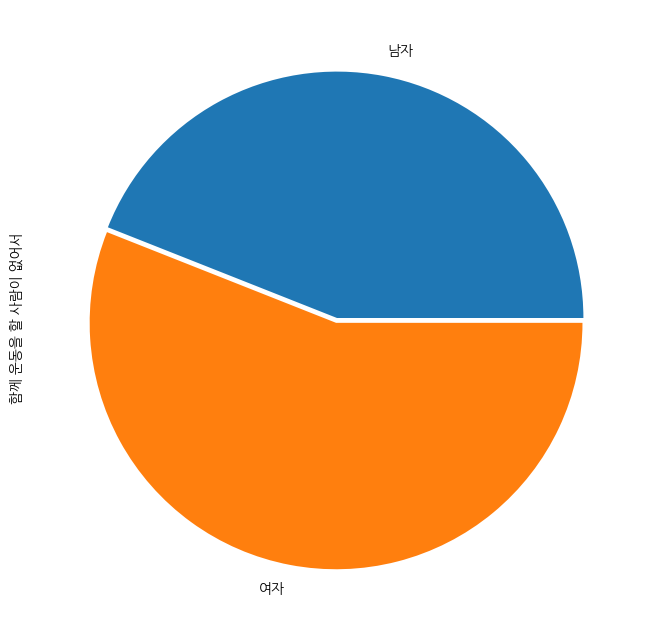

In [15]:
plt.figure(figsize=(10,8))
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02])
plt.show()

## subplots

- subplots(row, col, figsize)

2

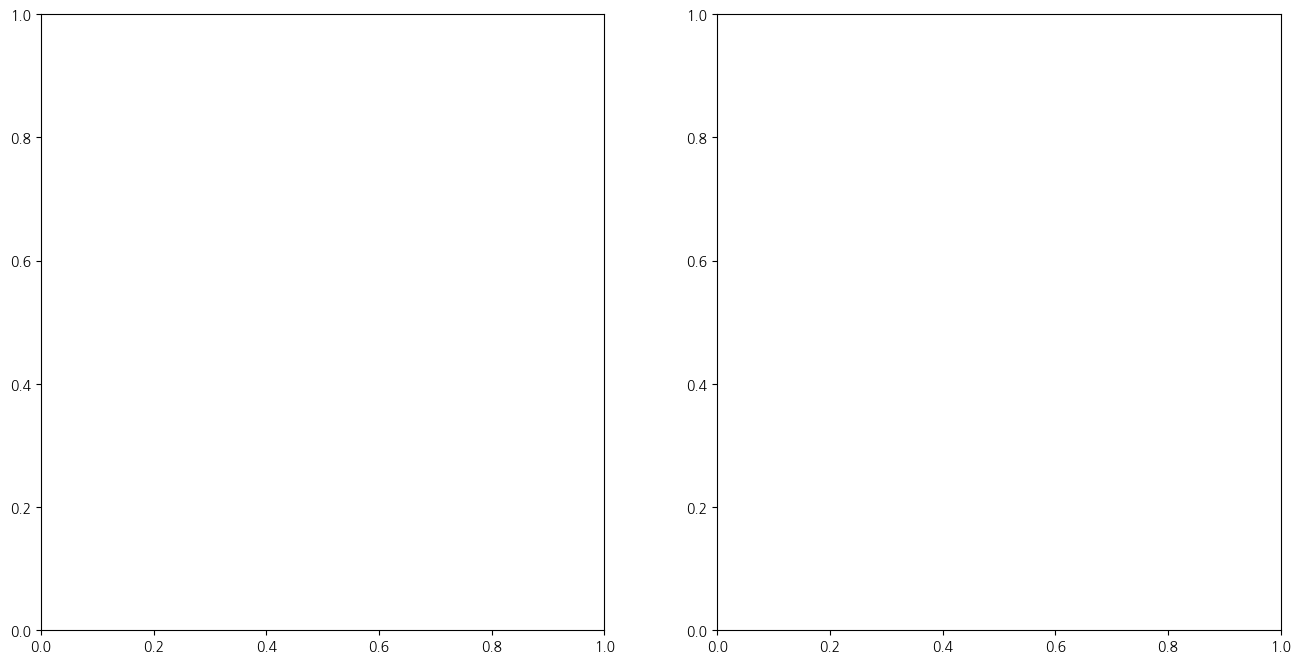

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
len(ax)

- ax : 그래프를 입력할 축 선택

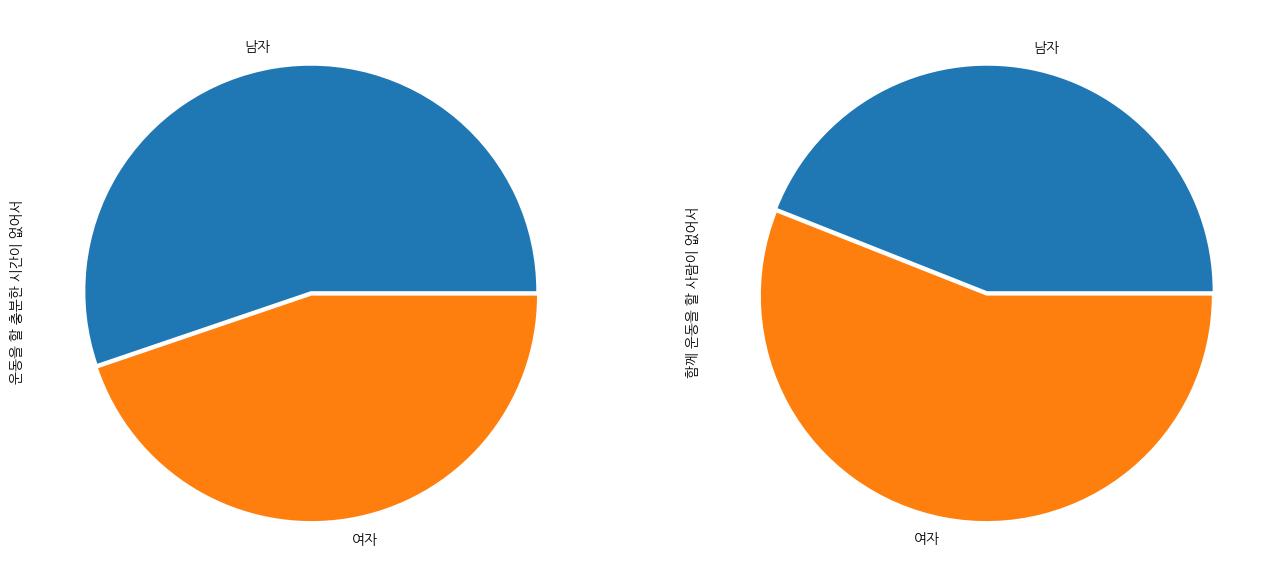

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[0])
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[1])
plt.show()

- autopct
    - autopercent : 데이터 비율 표시

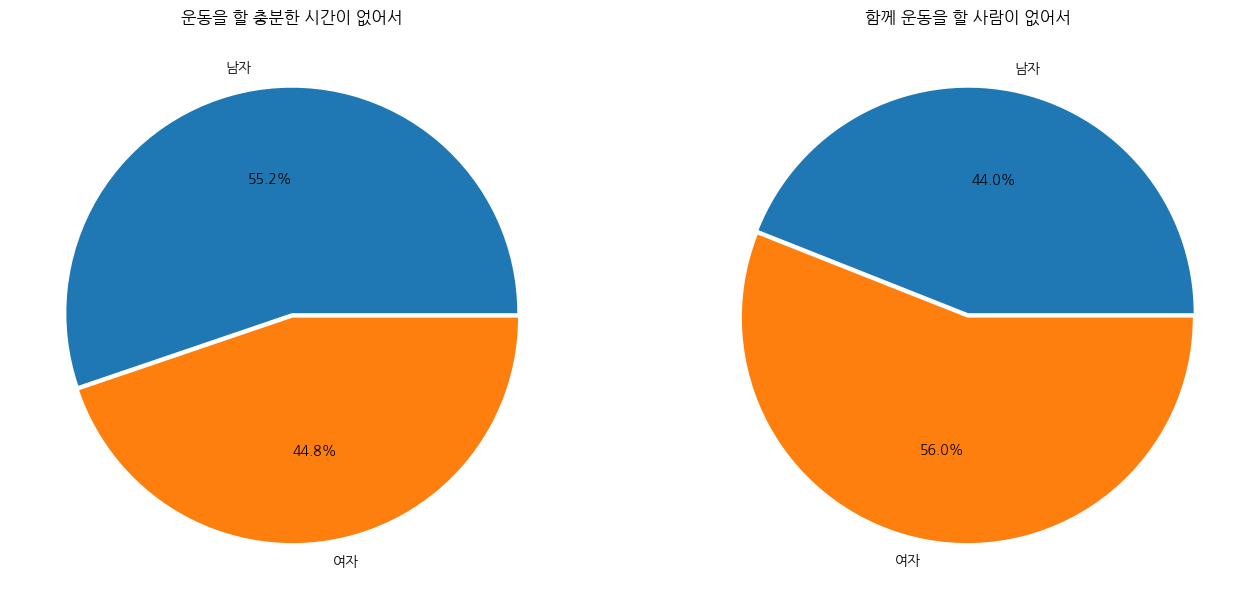

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
raw_data['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], 
                                       ax=ax[0], autopct='%1.1f%%')
ax[0].set_title('운동을 할 충분한 시간이 없어서')
ax[0].set_ylabel('')
raw_data['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02],
                                      ax=ax[1], autopct='%1.1f%%')
ax[1].set_title('함께 운동을 할 사람이 없어서')
ax[1].set_ylabel('')
plt.show()

# 실습 3 (서울시 청소년 정신건강 분석)

- url 링크를 통한 pandas 데이터 불러오기

In [1]:
url = 'https://github.com/PinkWink/playing_data/raw/master/data/teenage_mental.xls'

In [3]:
import pandas as pd
pd.read_excel(url)

,기간,구분,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,기간,구분,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [4]:
pd.read_excel(url, header=1)

,기간,구분,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,2018,구분,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


- 기간, 구분 제거

In [5]:
pd.read_excel(url, header=1, usecols='C:K')

,전체,남학생,여학생,전체.1,남학생.1,여학생.1,전체.2,남학생.2,여학생.2
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


- 목차 직접 설정하기

In [7]:
col_names = ['스트레스', '스트레스남학생', '스트레스여학생', '우울한경험률',
             '우울남학생', '우울여학생', '자살생각율', '자살남학생', '자살여학생']
raw_data = pd.read_excel(url, header=1, usecols='C:K', names=col_names)
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2


In [8]:
raw_data.loc[0]

스트레스       42.7
스트레스남학생    34.5
스트레스여학생    51.5
우울한경험률     29.6
우울남학생      24.2
우울여학생      35.4
자살생각율      15.4
자살남학생      11.8
자살여학생      19.2
Name: 0, dtype: float64

- 스트레스 받는 사람과 받지 않는 사람 확인

In [9]:
raw_data.loc[0,'스트레스']

np.float64(42.7)

In [10]:
raw_data.loc[1] = 100.0 - raw_data.loc[0]

In [11]:
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


In [13]:
raw_data['응답'] = ['그렇다', '아니다']
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
0,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2,그렇다
1,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8,아니다


In [14]:
raw_data = raw_data.set_index('응답')
raw_data

,스트레스,스트레스남학생,스트레스여학생,우울한경험률,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,42.7,34.5,51.5,29.6,24.2,35.4,15.4,11.8,19.2
아니다,57.3,65.5,48.5,70.4,75.8,64.6,84.6,88.2,80.8


- 데이터 시각화

In [15]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

- y축 label이 자동으로 설정됨

<Axes: ylabel='스트레스'>

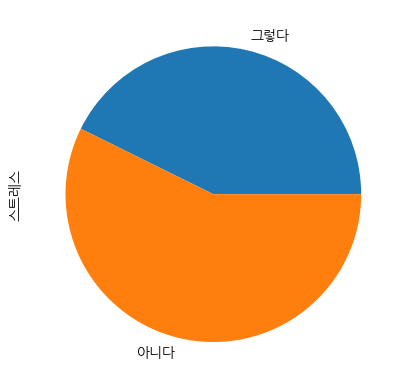

In [16]:
raw_data['스트레스'].plot.pie()

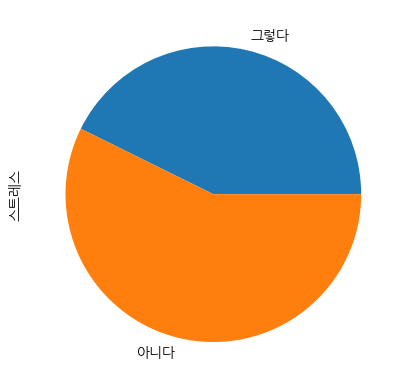

In [17]:
plt.figure()
raw_data['스트레스'].plot.pie()
plt.show()

- ylabel 제거

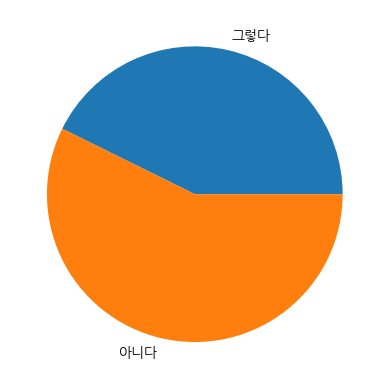

In [18]:
plt.figure()
raw_data['스트레스'].plot.pie()
plt.ylabel('')
plt.show()

- title 설정

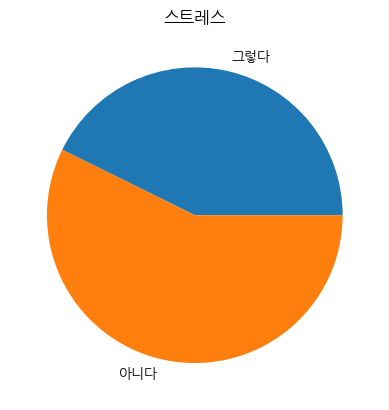

In [19]:
plt.figure()
raw_data['스트레스'].plot.pie()
plt.ylabel('')
plt.title('스트레스')
plt.show()

- autopct 설정

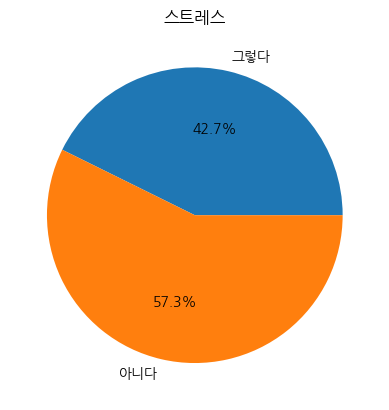

In [20]:
plt.figure()
raw_data['스트레스'].plot.pie(autopct='%.1f%%')
plt.ylabel('')
plt.title('스트레스')
plt.show()

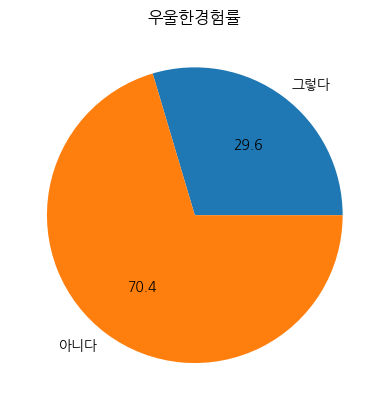

In [21]:
plt.figure()
raw_data['우울한경험률'].plot.pie(autopct='%.1f')
plt.ylabel('')
plt.title('우울한경험률')
plt.show()

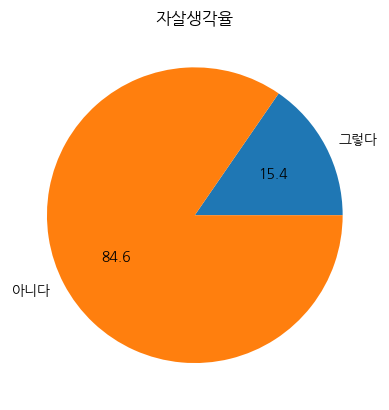

In [22]:
plt.figure()
raw_data['자살생각율'].plot.pie(autopct='%.1f')
plt.ylabel('')
plt.title('자살생각율')
plt.show()

- 한눈에 보기

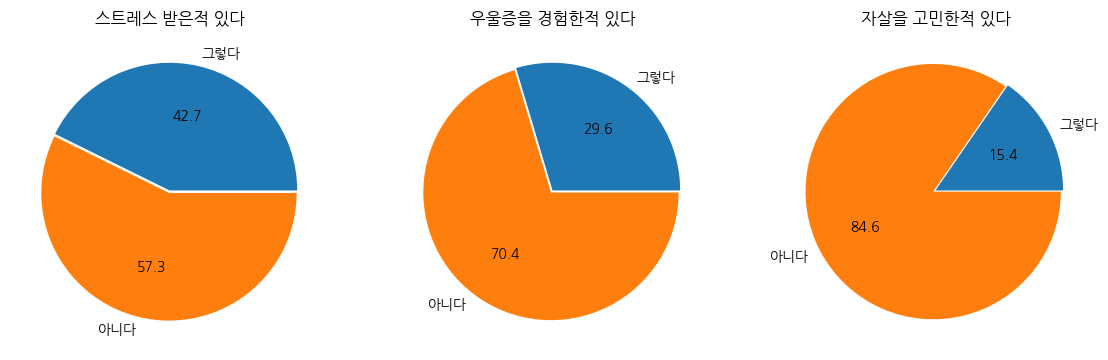

In [24]:
f, ax = plt.subplots(1, 3, figsize=(14,6))

raw_data['스트레스'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%.1f')
ax[0].set_title('스트레스 받은적 있다')
ax[0].set_ylabel('')

raw_data['우울한경험률'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%.1f')
ax[1].set_title('우울증을 경험한적 있다')
ax[1].set_ylabel('')

raw_data['자살생각율'].plot.pie(explode=[0, 0.02], ax=ax[2], autopct='%.1f')
ax[2].set_title('자살을 고민한적 있다')
ax[2].set_ylabel('')

plt.show()